Loading Breast Cancer dataset...


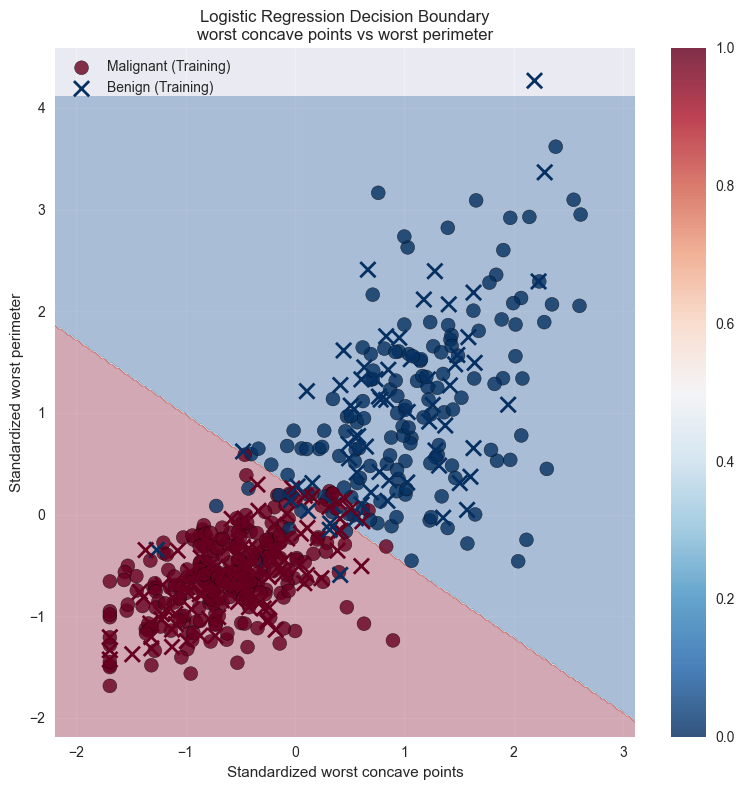

Training accuracy: 0.9523
Testing accuracy: 0.9240


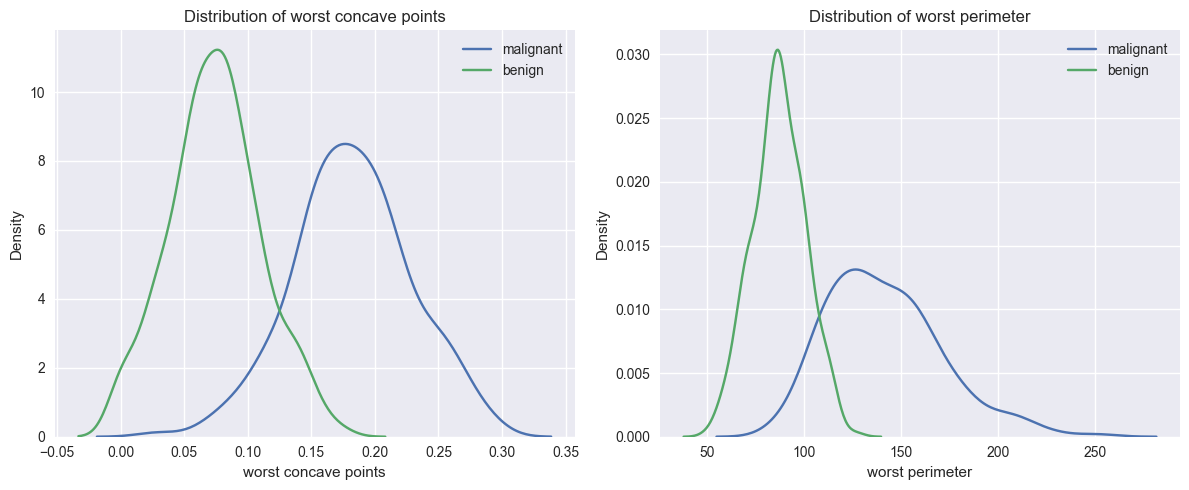


Logistic Regression equation:
log(p/(1-p)) = 0.8299 + (-2.3949 × worst concave points) + (-3.2651 × worst perimeter)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Set style
plt.style.use('seaborn-v0_8')

# Load the breast cancer dataset
print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Select two of the most important features (based on your previous model)
# Let's use 'worst concave points' and 'worst perimeter'
feature1 = 'worst concave points'
feature2 = 'worst perimeter'

# Extract these two features
X_2d = df[[feature1, feature2]].values
y_2d = df['target'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X_2d, y_2d, test_size=0.3, random_state=42, stratify=y_2d )

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Create a mesh grid to plot decision boundary
def plot_decision_boundary(model, X, y, X_test=None, y_test=None):
    # Set figure size
    plt.figure(figsize=(8, 8))
    
    # Determine grid bounds
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu_r)
    
    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', 
               cmap=plt.cm.RdBu_r, alpha=0.8, s=100)
    
    # If test data is provided, plot it too
    if X_test is not None and y_test is not None:
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x',
                   cmap=plt.cm.RdBu_r, alpha=1.0, s=120, linewidth=2)
    
    plt.colorbar(scatter)
    plt.xlabel(f'Standardized {feature1}')
    plt.ylabel(f'Standardized {feature2}')
    plt.title(f'Logistic Regression Decision Boundary\n{feature1} vs {feature2}')
    plt.legend(['Malignant (Training)', 'Benign (Training)', 
                'Malignant (Test)', 'Benign (Test)'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

# Plot the decision boundary with both training and test data
plot_decision_boundary(model, X_train_scaled, y_train, X_test_scaled, y_test)
plt.show()

# Calculate and print accuracy
train_accuracy = model.score(X_train_scaled, y_train) 
test_accuracy = model.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy: {test_accuracy:.4f}")

# Plot distribution of these two features by class 
plt.figure(figsize=(12, 5))

# Plot first feature
plt.subplot(1, 2, 1)
for target_val in [0, 1]:
    sns.kdeplot(
        df[df['target'] == target_val][feature1],
        label=f"{data.target_names[target_val]}"
    )
plt.title(f'Distribution of {feature1}')
plt.xlabel(feature1)
plt.legend()

# Plot second feature
plt.subplot(1, 2, 2)
for target_val in [0, 1]:
    sns.kdeplot(
        df[df['target'] == target_val][feature2],
        label=f"{data.target_names[target_val]}"
    )
plt.title(f'Distribution of {feature2}')
plt.xlabel(feature2)
plt.legend()

plt.tight_layout()
plt.show()

# Get logistic regression coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"\nLogistic Regression equation:")
print(f"log(p/(1-p)) = {intercept:.4f} + ({coefficients[0]:.4f} × {feature1}) + ({coefficients[1]:.4f} × {feature2})")

Loading Breast Cancer dataset...
Dataset shape: (569, 31)
Target names: ['malignant' 'benign']
Class distribution:
1    357
0    212
Name: count, dtype: int64

Creating a categorical feature from 'mean radius'...
Radius categories distribution:
radius_category
small     338
medium    209
large      22
Name: count, dtype: int64


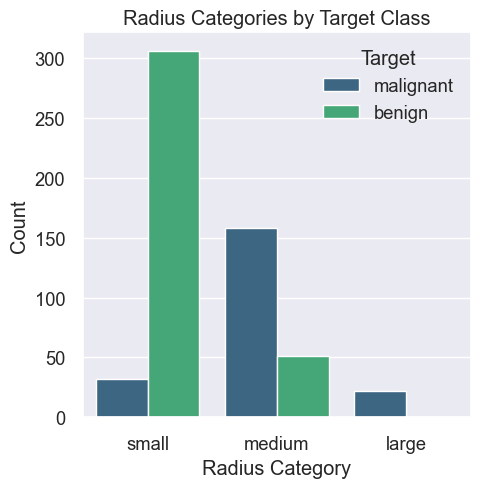

Features after one-hot encoding: 32
Training set shape: (426, 32)
Test set shape: (143, 32)

Training the logistic regression model...

--- CLASSIFICATION METRICS ---
      Metric     Value
0   Accuracy  0.986014
1  Precision  0.988889
2     Recall  0.988889
3   F1 Score  0.988889

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        53
      benign       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


--- CONFUSION MATRIX ---
[[52  1]
 [ 1 89]]


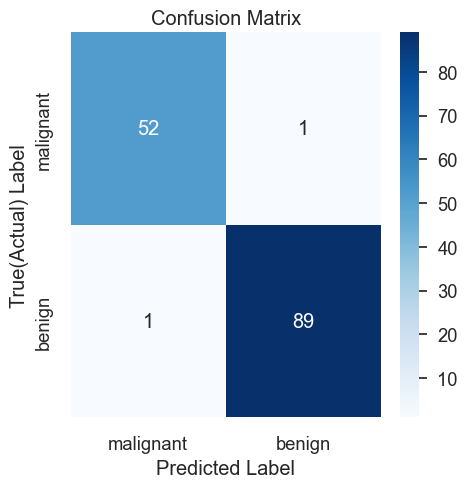

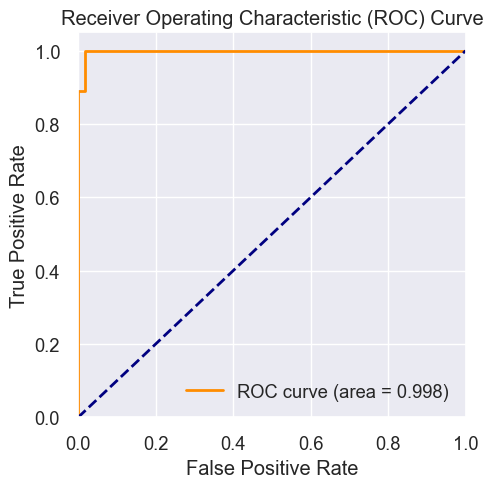

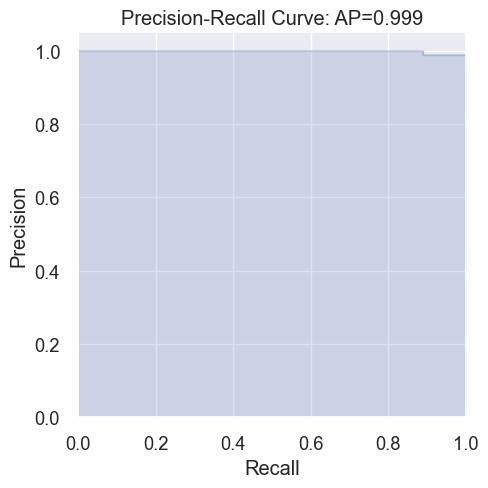


--- COEFFICIENTS FOR RADIUS CATEGORIES ---
          Feature  Coefficient
29   radius_small    -0.064811
30  radius_medium     0.056336
31   radius_large     0.002862

--- CROSS-VALIDATION RESULTS (5-FOLD) ---
Accuracy: 0.9473 ± 0.0200
Precision: 0.9491 ± 0.0321
Recall: 0.9692 ± 0.0164
F1 Score: 0.9586 ± 0.0153


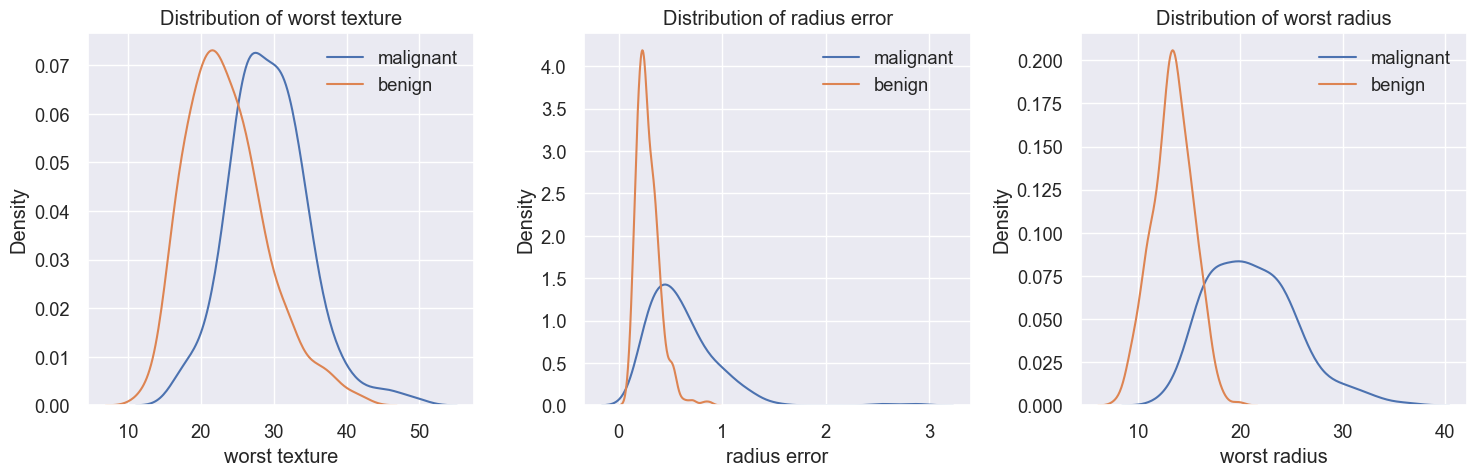


Analysis complete!


In [4]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Set display options and style for better visualization
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the breast cancer dataset
print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Display basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Target names: {data.target_names}")
print(f"Class distribution:\n{pd.Series(y).value_counts()}")

# Create a categorical feature by binning 'mean radius'
print("\nCreating a categorical feature from 'mean radius'...")
df['radius_category'] = pd.cut(df['mean radius'], bins=3, labels=['small', 'medium', 'large'])
print(f"Radius categories distribution:\n{df['radius_category'].value_counts()}")

# Visualize the radius categories
plt.figure(figsize=(5, 5))
sns.countplot(x='radius_category', hue='target', data=df, palette='viridis')
plt.title('Radius Categories by Target Class')
plt.xlabel('Radius Category')
plt.ylabel('Count')
plt.legend(title='Target', labels=data.target_names)
plt.show()

# Prepare features for modeling
X = df.drop(['target', 'radius_category', 'mean radius'], axis=1)
y = df['target']
categorical_feature = pd.get_dummies(df['radius_category'], prefix='radius')

# Combine numerical and one-hot encoded features
X = pd.concat([X, categorical_feature], axis=1)
print(f"Features after one-hot encoding: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Standardize numerical features
numerical_cols = list(X.columns[:-3])  # All except one-hot encoded columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Train logistic regression model
print("\nTraining the logistic regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ----------------- EVALUATION METRICS -----------------

# 1. Basic classification metrics
print("\n--- CLASSIFICATION METRICS ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})
print(metrics_df)

# 2. Classification report
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# 3. Confusion matrix
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4. Confusion matrix visualization
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True(Actual) Label')
plt.title('Confusion Matrix')
plt.show()

# 5. ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 6. Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(5, 5))
plt.step(recall_curve, precision_curve, color='b', alpha=0.2, where='post')
plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: AP={average_precision:.3f}')
plt.grid(True)
plt.show()

# 7. Feature importance
if hasattr(model, 'coef_'):
    # Get all feature names including one-hot encoded ones
    all_feature_names = list(X.columns)
    coefficients = model.coef_[0]
    
    # Create a DataFrame of features and their importance
    coef_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })
    
    # Sort by absolute coefficient values
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
    
  
    
    # See how the radius categories compare
    print("\n--- COEFFICIENTS FOR RADIUS CATEGORIES ---")
    radius_coefs = coef_df[coef_df['Feature'].str.contains('radius_')]
    print(radius_coefs)

# 8. Cross-validation for more robust metrics
print("\n--- CROSS-VALIDATION RESULTS (5-FOLD) ---")
cv_accuracy = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), 
                             X, y, cv=5, scoring='accuracy')
cv_precision = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), 
                              X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), 
                           X, y, cv=5, scoring='recall')
cv_f1 = cross_val_score(LogisticRegression(max_iter=1000, random_state=42), 
                        X, y, cv=5, scoring='f1')

print(f"Accuracy: {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# 9. Feature distribution visualization
features_to_plot = coef_df.head(3)['Feature'].values  # Top 3 most important features

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    if feature in df.columns:  # Only plot if feature is in original dataframe
        plt.subplot(1, 3, i+1)
        for target_val in [0, 1]:
            sns.kdeplot(
                df[df['target'] == target_val][feature],
                label=f"{data.target_names[target_val]}"
            )
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.legend()
plt.tight_layout()
plt.show()

print("\nAnalysis complete!")

Loading Breast Cancer dataset...
Dataset shape: (569, 31)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Class distribution: 1    357
0    212
Name: count, dtype: int64

Creating a categorical feature from 'mean radius'...
Radius categories distribution:
radius_category
small     338
medium    209
large      22
Name: count, dtype: int64
Features after one-hot encoding: 32
Training set shape: (426, 32)
Test set shape: (143, 32)

Training

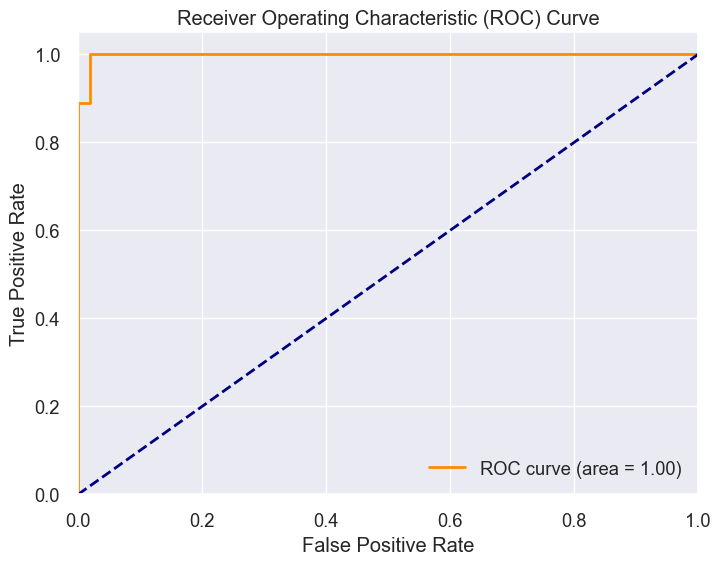


Top 10 Most Important Features:
                 Feature  Coefficient
20         worst texture    -1.238772
9           radius error    -1.073465
19          worst radius    -1.009731
22            worst area    -1.008092
12            area error    -0.970266
26  worst concave points    -0.948080
27        worst symmetry    -0.931698
21       worst perimeter    -0.800676
25       worst concavity    -0.796535
6    mean concave points    -0.725818

Coefficients for radius categories:
          Feature  Coefficient
29   radius_small    -0.064811
30  radius_medium     0.056336
31   radius_large     0.002862

Training and evaluation complete!


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the breast cancer dataset
print("Loading Breast Cancer dataset...")
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"Feature names: {feature_names}")
print(f"Target names: {data.target_names}")
print(f"Class distribution: {pd.Series(y).value_counts()}")

# Create a categorical feature by binning the first feature (mean radius)
print("\nCreating a categorical feature from 'mean radius'...")
# Bin the first feature into 3 categories
df['radius_category'] = pd.cut(df['mean radius'], bins=3, labels=['small', 'medium', 'large'])
print(f"Radius categories distribution:\n{df['radius_category'].value_counts()}")




# Split data into train and test sets
X = df.drop(['target', 'radius_category', 'mean radius'], axis=1)  # Remove target and categorical source
y = df['target']
categorical_feature = pd.get_dummies(df['radius_category'], prefix='radius')  # Manual one-hot encoding




# Combine the one-hot encoded features with the original numerical features
X = pd.concat([X, categorical_feature], axis=1)
print(f"Features after one-hot encoding: {X.shape[1]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Standardize the numerical features (excluding one-hot encoded columns)
numerical_cols = list(X.columns[:-3])  # All except the one-hot encoded columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])




# Train logistic regression model
print("\nTraining the logistic regression model...")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)




# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get feature importance (coefficients)
if hasattr(model, 'coef_'):
    # Get all feature names including one-hot encoded ones
    all_feature_names = list(X.columns)
    coefficients = model.coef_[0]
    
    # Create a DataFrame of features and their importance
    coef_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Coefficient': coefficients
    })
    
    # Sort by absolute coefficient values
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(coef_df.head(10))
    
    # See how the radius categories compare
    print("\nCoefficients for radius categories:")
    radius_coefs = coef_df[coef_df['Feature'].str.contains('radius_')]
    print(radius_coefs)

print("\nTraining and evaluation complete!")

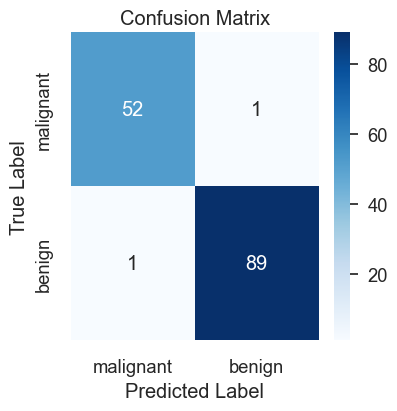

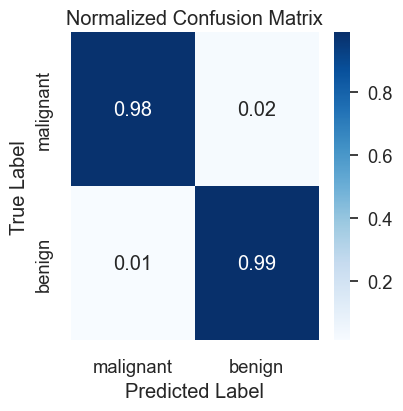

In [6]:
# Confusion Matrix Visualization with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

# First, make sure the confusion matrix is defined
# If you haven't run the cell that creates the confusion matrix, run this:
cm = confusion_matrix(y_test, y_pred)

# Now create the visualization
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Normalized confusion matrix
plt.figure(figsize=(4, 4))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

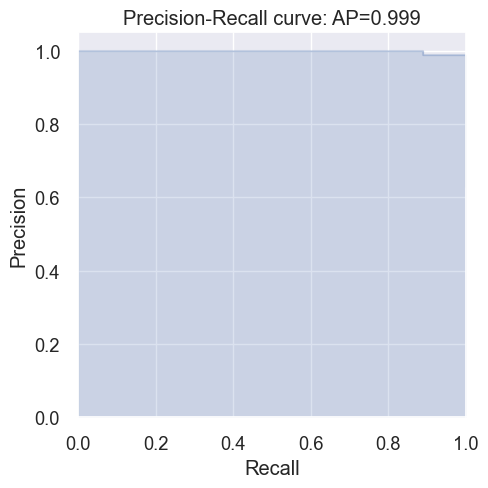

In [7]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(5, 5))
plt.step(recall_curve, precision_curve, color='b', alpha=0.2, where='post')
plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.3f}')
plt.grid(True)
plt.show()

In [8]:
# Calculate all metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics in a DataFrame for better presentation
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})
metrics_df

,Metric,Value
0,Accuracy,0.986014
1,Precision,0.988889
2,Recall,0.988889
3,F1 Score,0.988889


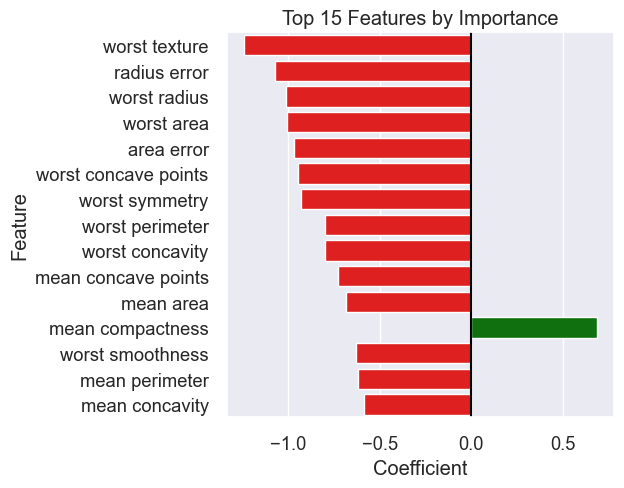

In [9]:
# Feature Importance Visualization
plt.figure(figsize=(5, 5))
top_features = coef_df.head(15)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]

sns.barplot(x='Coefficient', y='Feature', data=top_features, palette=colors)
plt.title('Top 15 Features by Importance')
plt.axvline(x=0, color='black', linestyle='-')
plt.show()

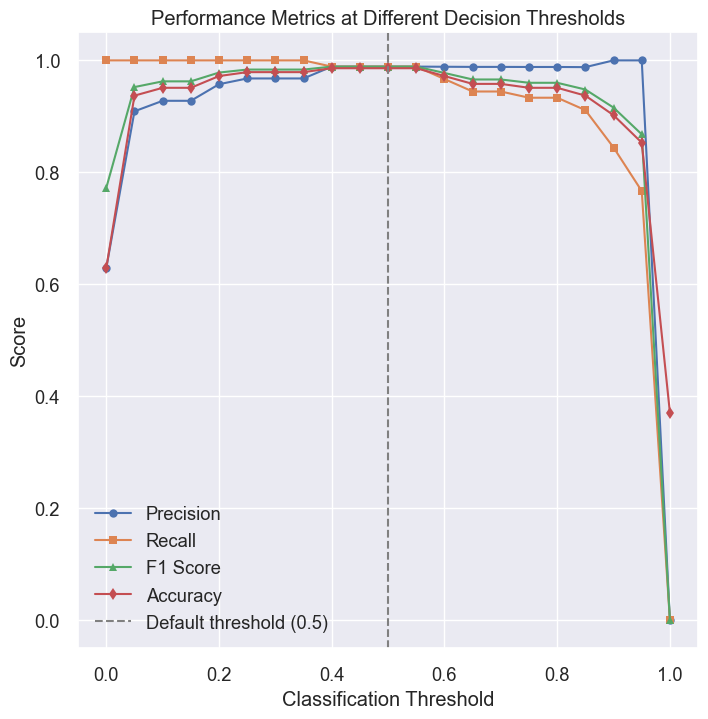

In [10]:
# Calculate precision and recall for different thresholds
thresholds = np.arange(0, 1.01, 0.05)
precision_at_threshold = []
recall_at_threshold = []
f1_at_threshold = []
accuracy_at_threshold = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precision_at_threshold.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_at_threshold.append(recall_score(y_test, y_pred_threshold, zero_division=0))
    f1_at_threshold.append(f1_score(y_test, y_pred_threshold, zero_division=0))
    accuracy_at_threshold.append(accuracy_score(y_test, y_pred_threshold))

# Create DataFrame for plotting
threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision_at_threshold,
    'Recall': recall_at_threshold,
    'F1 Score': f1_at_threshold,
    'Accuracy': accuracy_at_threshold
})

# Plot metrics vs threshold
plt.figure(figsize=(8, 8))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision', marker='o')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], label='Recall', marker='s')
plt.plot(threshold_df['Threshold'], threshold_df['F1 Score'], label='F1 Score', marker='^')
plt.plot(threshold_df['Threshold'], threshold_df['Accuracy'], label='Accuracy', marker='d')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default threshold (0.5)')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics at Different Decision Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Find the optimal threshold for F1 score
best_threshold_idx = np.argmax(f1_at_threshold)
best_threshold = thresholds[best_threshold_idx]
print(f"Optimal threshold for F1 score: {best_threshold:.2f}")
print(f"Metrics at optimal threshold:")
print(f"  - F1 Score: {f1_at_threshold[best_threshold_idx]:.4f}")
print(f"  - Precision: {precision_at_threshold[best_threshold_idx]:.4f}")
print(f"  - Recall: {recall_at_threshold[best_threshold_idx]:.4f}")
print(f"  - Accuracy: {accuracy_at_threshold[best_threshold_idx]:.4f}")

# Compare with default threshold (0.5)
default_idx = np.where(thresholds == 0.5)[0][0]
print("\nMetrics at default threshold (0.5):")
print(f"  - F1 Score: {f1_at_threshold[default_idx]:.4f}")
print(f"  - Precision: {precision_at_threshold[default_idx]:.4f}")
print(f"  - Recall: {recall_at_threshold[default_idx]:.4f}")
print(f"  - Accuracy: {accuracy_at_threshold[default_idx]:.4f}")

Optimal threshold for F1 score: 0.40
Metrics at optimal threshold:
  - F1 Score: 0.9889
  - Precision: 0.9889
  - Recall: 0.9889
  - Accuracy: 0.9860

Metrics at default threshold (0.5):
  - F1 Score: 0.9889
  - Precision: 0.9889
  - Recall: 0.9889
  - Accuracy: 0.9860


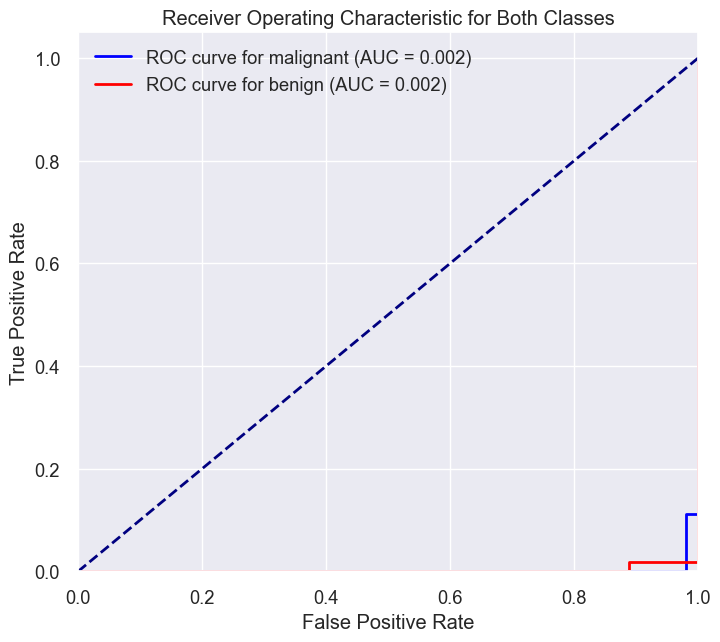

In [12]:
# ROC curves for both classes (malignant vs benign)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for both classes
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_prob_both = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, 0] if i == 0 else 1 - y_test_bin[:, 0], 
                                  y_prob_both[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 7))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, 
         label=f'ROC curve for {data.target_names[0]} (AUC = {roc_auc[0]:.3f})')
plt.plot(fpr[1], tpr[1], color='red', lw=2, 
         label=f'ROC curve for {data.target_names[1]} (AUC = {roc_auc[1]:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [13]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
print(f"Total misclassified examples: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    # Get X_test data as DataFrame for better analysis
    X_test_df = pd.DataFrame(X_test, columns=X.columns)
    
    # Add target and predictions
    X_test_df['True Label'] = y_test
    X_test_df['Predicted'] = y_pred
    X_test_df['Probability'] = y_prob
    
    # Show misclassified examples
    misclassified = X_test_df.iloc[misclassified_idx].sort_values('Probability')
    print("\nMost uncertain misclassifications (closest to decision boundary):")
    display(misclassified.iloc[:5])

Total misclassified examples: 2

Most uncertain misclassifications (closest to decision boundary):


,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,radius_small,radius_medium,radius_large,True Label,Predicted,Probability
541,1.281902,0.174573,0.019601,-0.573737,0.371464,0.148059,-0.242119,0.253417,0.087263,-0.550215,-0.236598,-0.107775,-0.389108,0.019284,1.133217,0.176649,-0.005462,-0.012423,0.808966,0.003635,0.955377,0.200431,-0.113925,0.072261,1.012309,0.576406,0.094444,0.421017,0.972977,False,True,False,1,0,0.393817
73,-0.788966,-0.048141,-0.189641,0.351253,0.466514,-0.136571,0.064465,-0.507114,0.398570,-0.457070,-1.041807,-0.445288,-0.383294,-0.765489,-0.266836,-0.454542,-0.386526,-0.969564,-0.240897,0.076510,-0.769200,0.104649,-0.107657,0.386106,0.605311,0.000883,0.359433,-0.494824,1.010357,True,False,False,0,1,0.882316


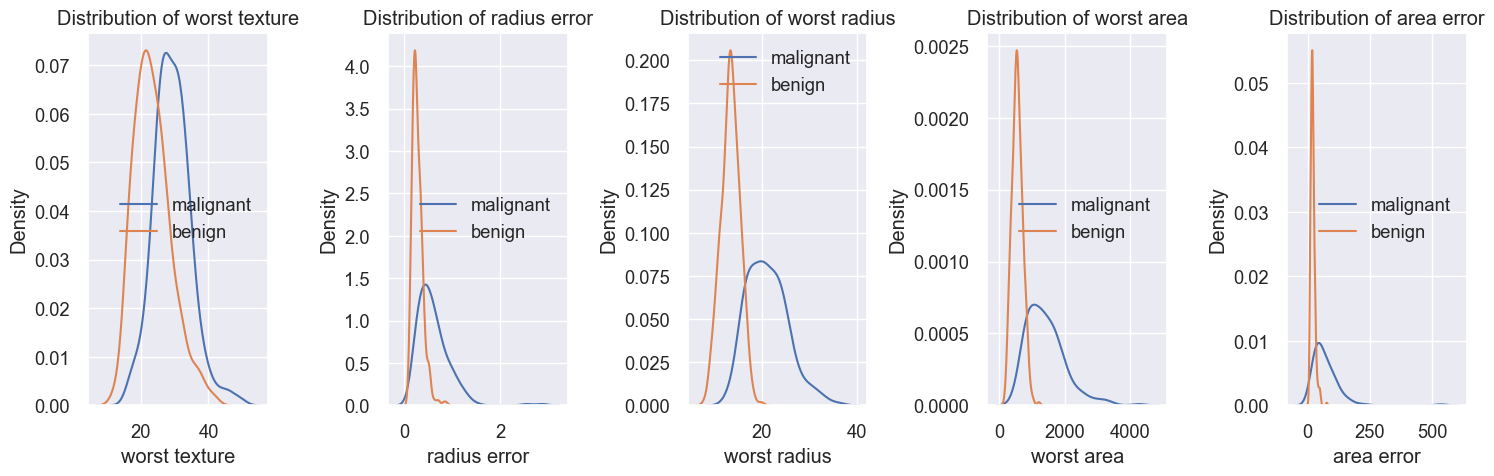

In [14]:
# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualize feature distributions by class
features_to_plot = coef_df.head(5)['Feature'].values  # Top 3 most important features

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 5, i+1)
    for target_val in [0, 1]:
        sns.kdeplot(
            df[df['target'] == target_val][feature],
            label=f"{data.target_names[target_val]}"
        )
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

False Positives (benign predicted as malignant): 1
False Negatives (malignant predicted as benign): 1


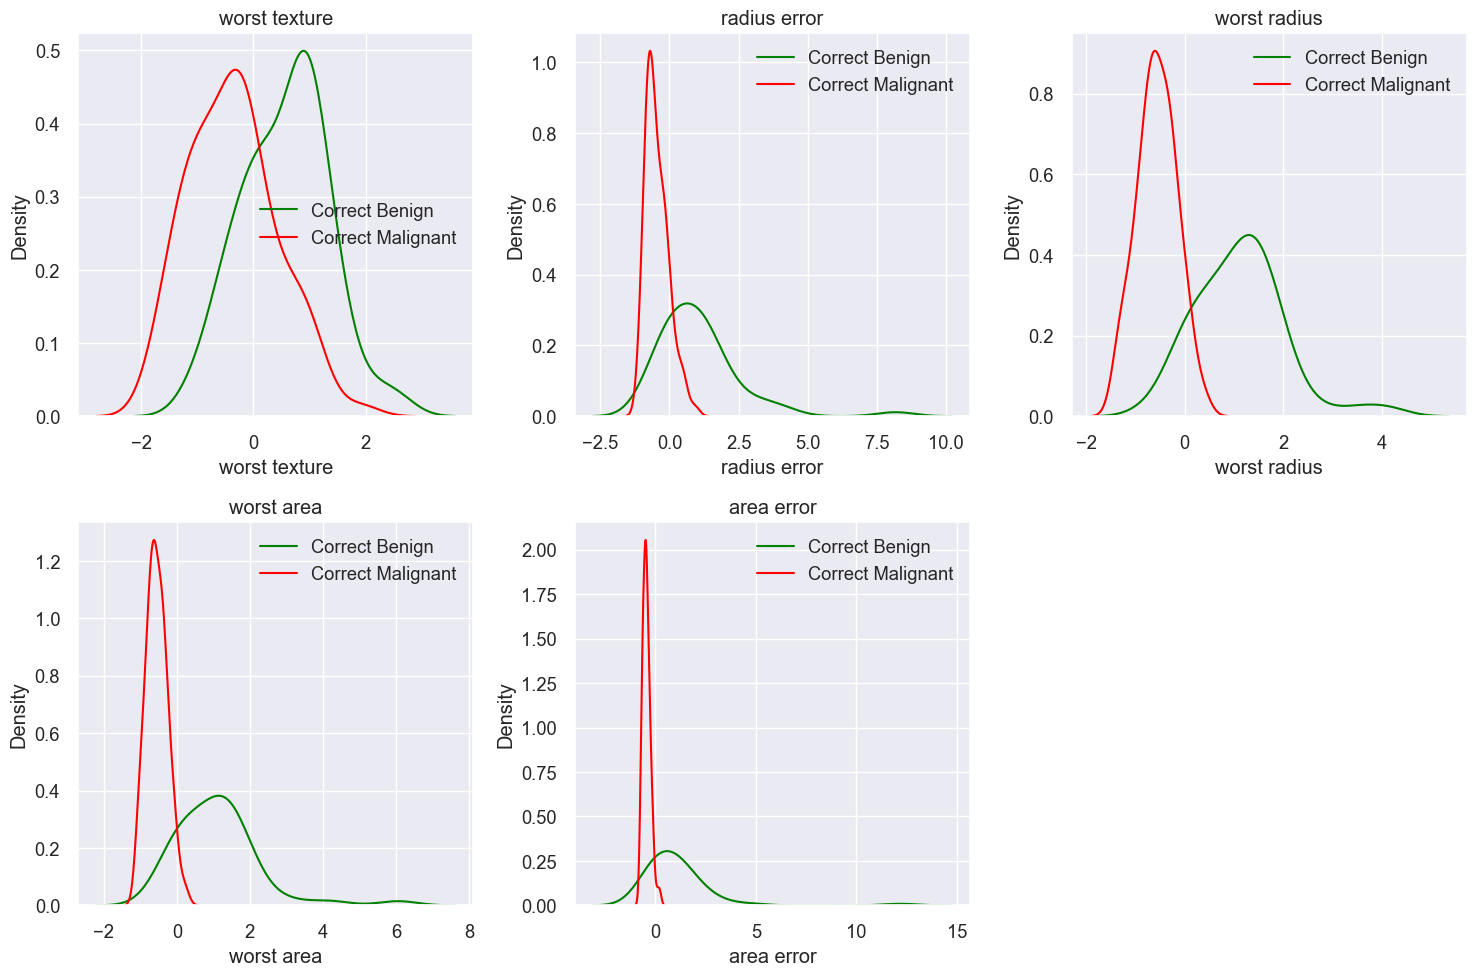

In [15]:
# Separate false positives and false negatives
false_positives = misclassified[
    (misclassified['True Label'] == 0) & (misclassified['Predicted'] == 1)]
false_negatives = misclassified[
    (misclassified['True Label'] == 1) & (misclassified['Predicted'] == 0)]

print(f"False Positives (benign predicted as malignant): {len(false_positives)}")
print(f"False Negatives (malignant predicted as benign): {len(false_negatives)}")

# Compare feature values of misclassifications vs correct classifications
# For key features
top_features = ['worst texture', 'radius error', 'worst radius', 'worst area', 'area error']

# For each top feature, compare distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    
    # Correctly classified
    sns.kdeplot(X_test_df[(X_test_df['True Label'] == X_test_df['Predicted']) & 
                         (X_test_df['True Label'] == 0)][feature],
               label="Correct Benign", color="green", linestyle="-")
    sns.kdeplot(X_test_df[(X_test_df['True Label'] == X_test_df['Predicted']) & 
                         (X_test_df['True Label'] == 1)][feature],
               label="Correct Malignant", color="red", linestyle="-")
    
    # Misclassified
    if len(false_positives) > 0:
        sns.kdeplot(false_positives[feature],
                   label="False Positive", color="green", linestyle="--")
    if len(false_negatives) > 0:
        sns.kdeplot(false_negatives[feature],
                   label="False Negative", color="red", linestyle="--")
        
    plt.title(f"{feature}")
    plt.legend()
    
plt.tight_layout()
plt.show()

In [16]:
print(data.target_names)

['malignant' 'benign']


In [17]:
# took inverse value of malignant =1  and banign =0 instead of malignant = 0 and banign = 1
#displayed incorrect probability then solved through scaling and above issue


In [18]:
#used 0.25 test split

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Create a DataFrame for better handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
# Note: In the breast cancer dataset, target=0 means malignant, target=1 means benign

# Prepare features for modeling - use original feature names only
X = df.drop(['target'], axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
#max iteration upto which tp train else stop

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importance
coefficients = model.coef_[0]
coef_df = pd.DataFrame({
    'Feature': list(X.columns),
    'Coefficient': coefficients
})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
top_features = coef_df.head(15)

# Create widgets for user input
style = {'description_width': '150px'}
layout = widgets.Layout(width='95%')

# Create a title
title = widgets.HTML("<h1 style='text-align: center;font-style: bold; color: #ffffff;'>Breast Cancer Diagnostic Tool</h1>")
subtitle = widgets.HTML("<p style='text-align: center; font-style: italic;'>Enter measurements from cell sample analysis to predict malignancy probability</p>")
# Simple explanation text
explanation = widgets.HTML("<p style='text-align: center;'><strong>Benign:</strong> Non-cancerous growth | <strong>Malignant:</strong> Cancerous growth</p>")

# Feature section titles
texture_title = widgets.HTML("<h3 style='margin-bottom: 12px; color: #3498DB;'>Cell Texture Features</h3>")
size_title = widgets.HTML("<h3 style='margin-bottom: 12px; color: #3498DB;'>Cell Size Features</h3>")
consistency_title = widgets.HTML("<h3 style='margin-bottom: 12px; color: #3498DB;'>Measurement Consistency</h3>")
advanced_title = widgets.HTML("<h3 style='margin-bottom: 12px; color: #3498DB;'>Additional Features</h3>")

# Create widgets for top 5 features
worst_texture = widgets.FloatSlider(
    value=20.0, min=10.0, max=40.0, step=0.1,
    description='Worst Texture:',
    style=style, layout=layout,
    tooltip='Variance of gray-scale values in cell images'
)

radius_error = widgets.FloatSlider(
    value=0.5, min=0.1, max=1.0, step=0.01,
    description='Radius Error:',
    style=style, layout=layout,
    tooltip='Standard error in radius measurements'
)

worst_radius = widgets.FloatSlider(
    value=15.0, min=8.0, max=30.0, step=0.1,
    description='Worst Radius:',
    style=style, layout=layout,
    tooltip='Largest measured radius in sample'
)

worst_area = widgets.FloatSlider(
    value=700.0, min=200.0, max=3000.0, step=10.0,
    description='Worst Area:',
    style=style, layout=layout,
    tooltip='Largest measured area in sample'
)

area_error = widgets.FloatSlider(
    value=30.0, min=5.0, max=100.0, step=1.0,
    description='Area Error:',
    style=style, layout=layout,
    tooltip='Standard error in area measurements'
)

# Optional features - initially hidden
mean_concave_points = widgets.FloatSlider(
    value=0.05, min=0.0, max=0.2, step=0.005,
    description='Mean Concave Points:',
    style=style, layout=layout,
    tooltip='Average number of concave portions of cell contour'
)

worst_concave_points = widgets.FloatSlider(
    value=0.1, min=0.0, max=0.3, step=0.005,
    description='Worst Concave Points:',
    style=style, layout=layout,
    tooltip='Largest number of concave portions in a cell'
)

mean_perimeter = widgets.FloatSlider(
    value=80.0, min=40.0, max=200.0, step=1.0,
    description='Mean Perimeter:',
    style=style, layout=layout,
    tooltip='Average perimeter measurement'
)

worst_perimeter = widgets.FloatSlider(
    value=100.0, min=50.0, max=250.0, step=1.0,
    description='Worst Perimeter:',
    style=style, layout=layout,
    tooltip='Largest perimeter measurement'
)

mean_texture = widgets.FloatSlider(
    value=18.0, min=10.0, max=35.0, step=0.1,
    description='Mean Texture:',
    style=style, layout=layout,
    tooltip='Average texture measurement'
)

# Toggle for additional features
show_additional = widgets.Checkbox(
    value=False,
    description='Show additional features',
    layout=widgets.Layout(width='auto', margin='10px 0px 10px 0px')
)

# Button to make prediction
predict_button = widgets.Button(
    description='Generate Diagnosis',
    button_style='danger',
    layout=widgets.Layout(width='50%', margin='20px auto', display='flex')
)

# Output area for results
result_output = widgets.Output()

# Create accordion for additional features
additional_features = widgets.Accordion(children=[
    widgets.VBox([
        advanced_title,
        mean_concave_points,
        worst_concave_points,
        mean_perimeter,
        worst_perimeter,
        mean_texture
    ])
], layout=widgets.Layout(width='95%', margin='10px 0px'))
additional_features.set_title(0, 'Additional Features (Optional)')
additional_features.selected_index = None  # Start collapsed

# Important Features Display
imp_features = widgets.Output()
with imp_features:
    # Display the top 5 most important features text only
    top_5 = coef_df.head(5)
    display(HTML("<h3>Top 5 Most Important Features:</h3>"))
    
    for i, (feature, coef) in enumerate(zip(top_5['Feature'], top_5['Coefficient'])):
        direction = "increases" if coef > 0 else "decreases" 
        # CHANGED: Fixed feature importance interpretation
        prediction = "benign" if coef > 0 else "malignant"  # In the dataset: 1=benign, 0=malignant
        display(HTML(f"<p><strong>{i+1}. {feature}</strong> - Higher values {direction} likelihood of {prediction} prediction</p>"))

# Tabs for different sections
tab = widgets.Tab([
    widgets.VBox([
        title,
        subtitle,
        explanation,
        widgets.HTML("<div style='height: 15px;'></div>"),  # Spacer
        
        # Main features in a vertical layout
        texture_title,
        worst_texture,
        widgets.HTML("<div style='height: 15px;'></div>"),  # Spacer
        
        size_title,
        worst_radius,
        worst_area,
        widgets.HTML("<div style='height: 15px;'></div>"),  # Spacer
        
        consistency_title,
        radius_error,
        area_error,
        widgets.HTML("<div style='height: 15px;'></div>"),  # Spacer
        
        additional_features,
        widgets.HTML("<div style='height: 10px;'></div>"),  # Spacer
        
        predict_button,
        result_output
    ], layout=widgets.Layout(width='100%', padding='0px 20px')),
    imp_features,
    widgets.Output()
])

# Name the tabs
tab.set_title(0, 'Diagnosis Tool')
tab.set_title(1, 'Important Features')
tab.set_title(2, 'About the Model')

# Function to toggle additional features
def toggle_additional(change):
    if change['new']:
        additional_features.selected_index = 0  # Expand
    else:
        additional_features.selected_index = None  # Collapse

show_additional.observe(toggle_additional, names='value')

# Function to make prediction
def make_prediction(b):
    with result_output:
        clear_output()
        
        # Map slider values to feature names in original dataset
        input_features = {
            'worst texture': worst_texture.value,
            'radius error': radius_error.value,
            'worst radius': worst_radius.value,
            'worst area': worst_area.value,
            'area error': area_error.value,
            'mean concave points': mean_concave_points.value,
            'worst concave points': worst_concave_points.value,
            'mean perimeter': mean_perimeter.value,
            'worst perimeter': worst_perimeter.value,
            'mean texture': mean_texture.value
        }
        
        # Create a complete feature array with all 30 features
        # Initialize with mean values
        features_array = np.array([X.mean(axis=0)])
        
        # Update with user input values where they exist
        for feature, value in input_features.items():
            if feature in X.columns:
                col_idx = X.columns.get_loc(feature)
                features_array[0, col_idx] = value
        
        # Scale all features at once
        features_scaled = scaler.transform(features_array)
        
        # Make prediction with the scaled features
        probability = model.predict_proba(features_scaled)[0][1]  # Probability of class 1 (benign)
        prediction = 1 if probability >= 0.5 else 0  # CHANGED: Using standard 0.5 threshold
        
        # Display result (simplified)
        # CHANGED: Fixed result interpretation (in the dataset: 1=benign, 0=malignant)
        if prediction == 0:  # 0 means malignant
            color = "#E74C3C"  # Red
            result = "Suspected Malignant"
            malignancy_prob = 1.0 - probability  # Convert to malignancy probability
        else:  # 1 means benign
            color = "#2ECC71"  # Green
            result = "Likely Benign"
            malignancy_prob = 1.0 - probability
            
        display(HTML(f"<h2 style='color:{color}; text-align: center;'>{result}</h2>"))
        display(HTML(f"<h3 style='text-align: center;'>Malignancy Probability: {malignancy_prob:.1%}</h3>"))
        
        # Key contributing factors (simplified)
        display(HTML("<h3 style='margin-top: 25px;'>Key contributing factors:</h3>"))
        
        # Find the top 3 features that most influenced this specific prediction
        contributions = []
        for feature, value in input_features.items():
            if feature in X.columns:
                coef = coef_df.loc[coef_df['Feature'] == feature, 'Coefficient'].values
                if len(coef) > 0:
                    # Calculate contribution
                    mean_val = X[feature].mean()
                    std_val = X[feature].std()
                    # Normalize the value like StandardScaler would
                    normalized_val = (value - mean_val) / std_val
                    contribution = normalized_val * coef[0]
                    contributions.append((feature, contribution, value, coef[0]))
        
        # Sort by absolute contribution
        contributions.sort(key=lambda x: abs(x[1]), reverse=True)
        
        # Display top 3 contributions
        for i, (feature, contrib, value, coef) in enumerate(contributions[:3]):
            direction = "high" if value > X[feature].mean() else "low"
            impact = "increased" if contrib > 0 else "decreased"
            # CHANGED: Fixed likelihood interpretation
            likelihood = "benign condition" if coef > 0 else "malignancy"
            
            display(HTML(f"<p>{i+1}. <strong>{feature}</strong>: {direction} value ({value:.2f}) - {impact} likelihood of {likelihood}</p>"))

predict_button.on_click(make_prediction)

# Initialize about the model tab
with tab.children[2]:
    # Print model performance
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Use HTML for better formatting
    display(HTML("<h2 style='text-align: center; margin-bottom: 25px;'>About the Diagnostic Model</h2>"))
    
    display(HTML("<h3>Performance Metrics</h3>"))
    
    # Display metrics using HTML for better formatting
    display(HTML(f"""
    <div style='display: flex; justify-content: space-around; text-align: center; margin: 20px 0;'>
        <div style='border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 20%;'>
            <h4>Accuracy</h4>
            <p style='font-size: 24px; font-weight: bold;'>{accuracy:.1%}</p>
        </div>
        <div style='border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 20%;'>
            <h4>Precision</h4>
            <p style='font-size: 24px; font-weight: bold;'>{precision:.1%}</p>
        </div>
        <div style='border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 20%;'>
            <h4>Recall</h4>
            <p style='font-size: 24px; font-weight: bold;'>{recall:.1%}</p>
        </div>
        <div style='border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 20%;'>
            <h4>F1 Score</h4>
            <p style='font-size: 24px; font-weight: bold;'>{f1:.1%}</p>
        </div>
    </div>
    """))

# Display the interactive UI
display(tab)


In [19]:
# # Decision Tree implementation for Breast Cancer dataset
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns

# # Check what data we're working with
# print(f"X_train_scaled shape: {X_train_scaled.shape}")
# print(f"Number of features in model: {len(dt_model.feature_importances_)}")

# # Train a Decision Tree model using the same train/test split
# dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
# dt_model.fit(X_train_scaled, y_train)

# # Make predictions
# dt_pred = dt_model.predict(X_test_scaled)

# # Calculate evaluation metrics for Decision Tree
# dt_accuracy = accuracy_score(y_test, dt_pred)
# dt_precision = precision_score(y_test, dt_pred)
# dt_recall = recall_score(y_test, dt_pred)
# dt_f1 = f1_score(y_test, dt_pred)

# # Get Decision Tree feature importance - use the correct number of features
# if X_train_scaled.shape[1] == 2:
#     # If using 2D data
#     feature_names = [feature1, feature2]
# else:
#     # If using all features
#     feature_names = X.columns.tolist()

# dt_feature_importance = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': dt_model.feature_importances_
# })
# dt_feature_importance = dt_feature_importance.sort_values('Importance', ascending=False)

# # Print metrics comparison
# print("Model Performance Comparison:")
# print(f"{'Metric':<15} {'Logistic Regression':<20} {'Decision Tree':<20}")
# print("-" * 60)
# print(f"{'Accuracy':<15} {accuracy:<20.4f} {dt_accuracy:<20.4f}")
# print(f"{'Precision':<15} {precision:<20.4f} {dt_precision:<20.4f}")
# print(f"{'Recall':<15} {recall:<20.4f} {dt_recall:<20.4f}")
# print(f"{'F1 Score':<15} {f1:<20.4f} {dt_f1:<20.4f}")

# # Display top 10 most important features
# print(f"\nTop 10 Decision Tree Features:")
# print(dt_feature_importance.head(10))

COMPLETE DECISION TREE vs LOGISTIC REGRESSION COMPARISON

1. Loading and Preprocessing Data...
Dataset shape: (569, 31)
Target distribution: {1: 357, 0: 212}
Target names: ['malignant' 'benign']
Training set shape: (398, 30)
Test set shape: (171, 30)

2. Training Models...
✓ Decision Tree trained
✓ Logistic Regression trained

3. Model Evaluation...

MODEL PERFORMANCE COMPARISON:
--------------------------------------------------
Accuracy     | DT: 0.9357 | LR: 0.9883
Precision    | DT: 0.9444 | LR: 0.9907
Recall       | DT: 0.9533 | LR: 0.9907
F1_Score     | DT: 0.9488 | LR: 0.9907

4. Decision Tree Visualization...


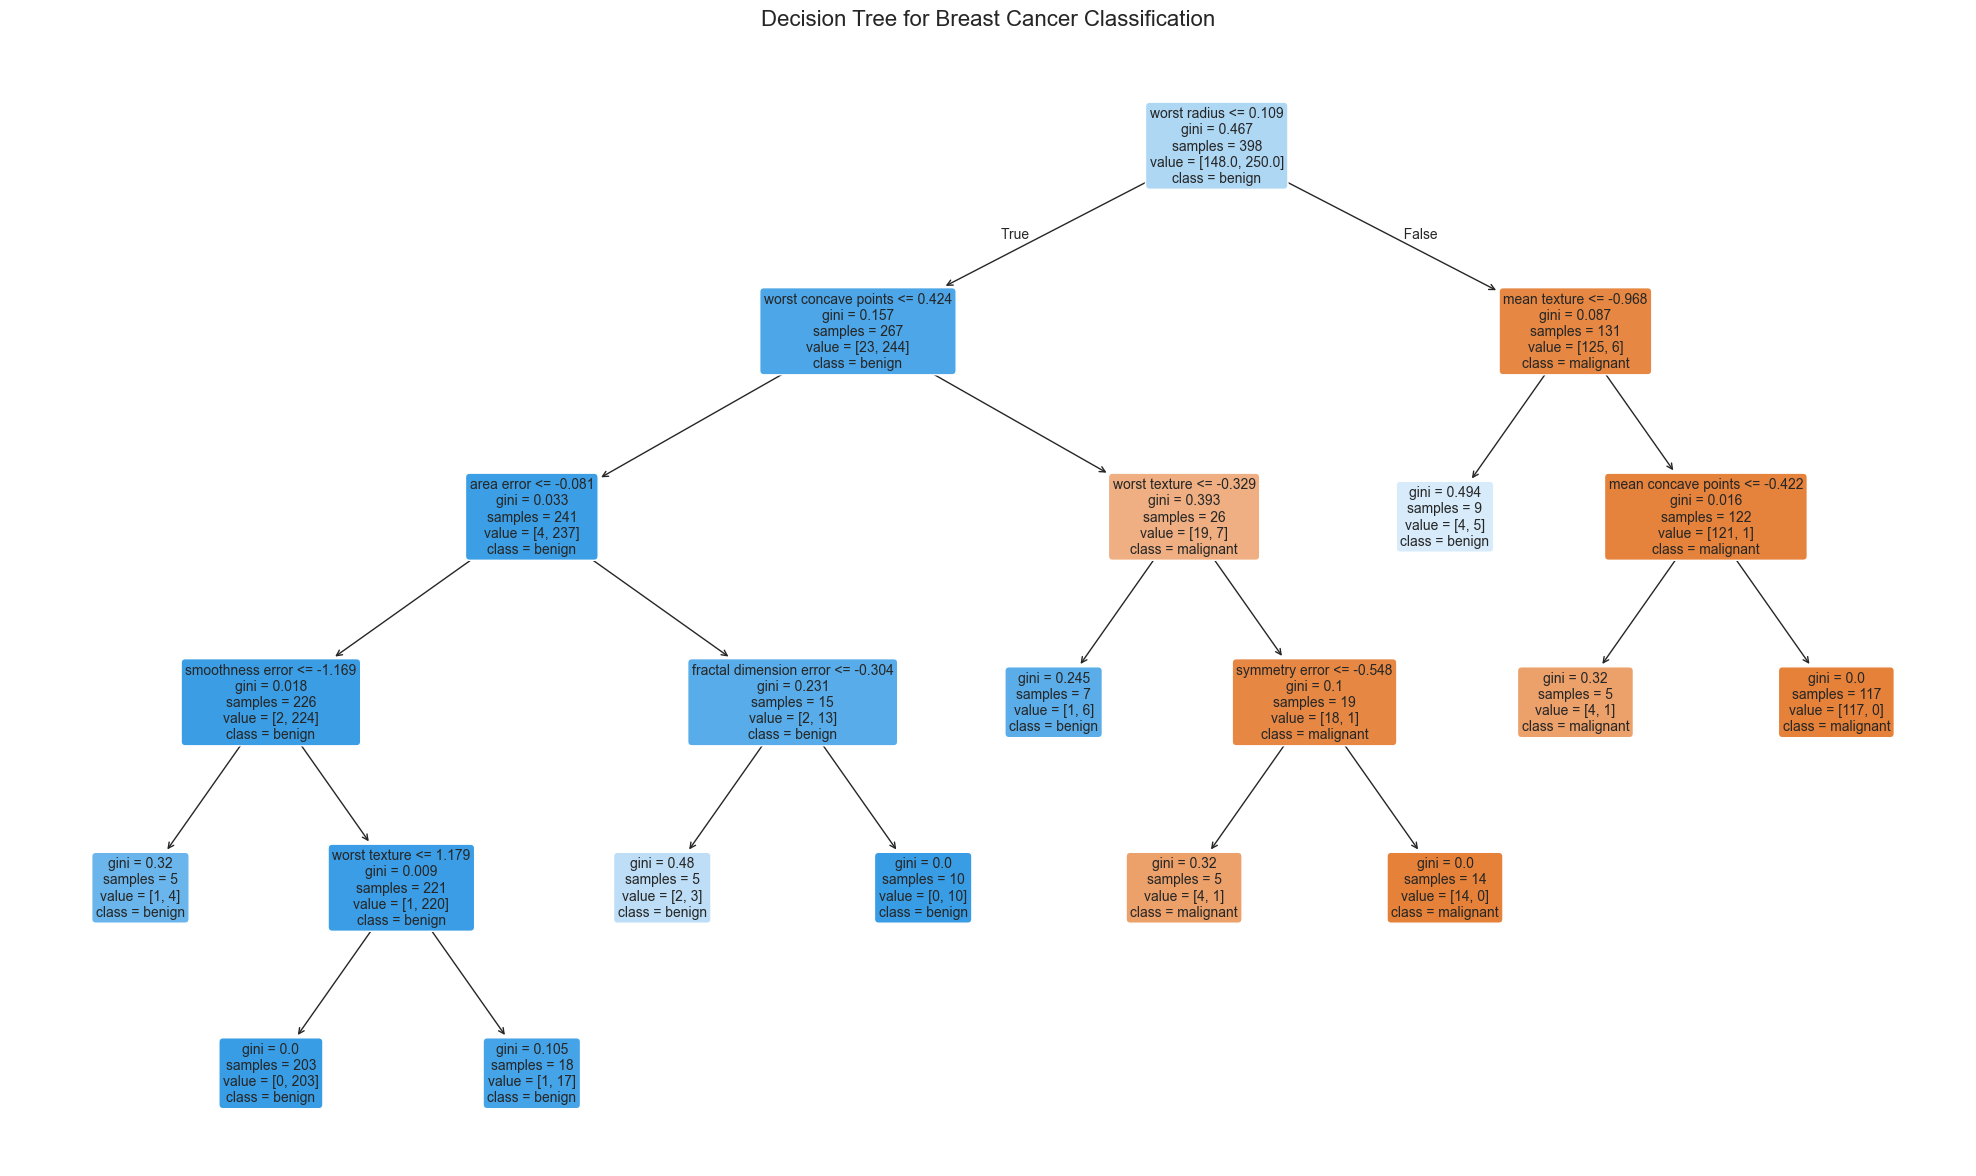


5. Feature Importance Analysis...

Top 10 Most Important Features:

Decision Tree:
                Feature  Importance
           worst radius    0.775956
   worst concave points    0.140258
          worst texture    0.039394
           mean texture    0.029425
fractal dimension error    0.006249
             area error    0.002554
    mean concave points    0.002247
       smoothness error    0.002189
         symmetry error    0.001727
        mean smoothness    0.000000

Logistic Regression:
             Feature  Coefficient
       worst texture     1.226329
worst concave points     0.996807
          worst area     0.954956
        worst radius     0.941060
          area error     0.937493
        radius error     0.886370
      worst symmetry     0.869444
     worst concavity     0.785989
    worst smoothness     0.748971
     worst perimeter     0.731042


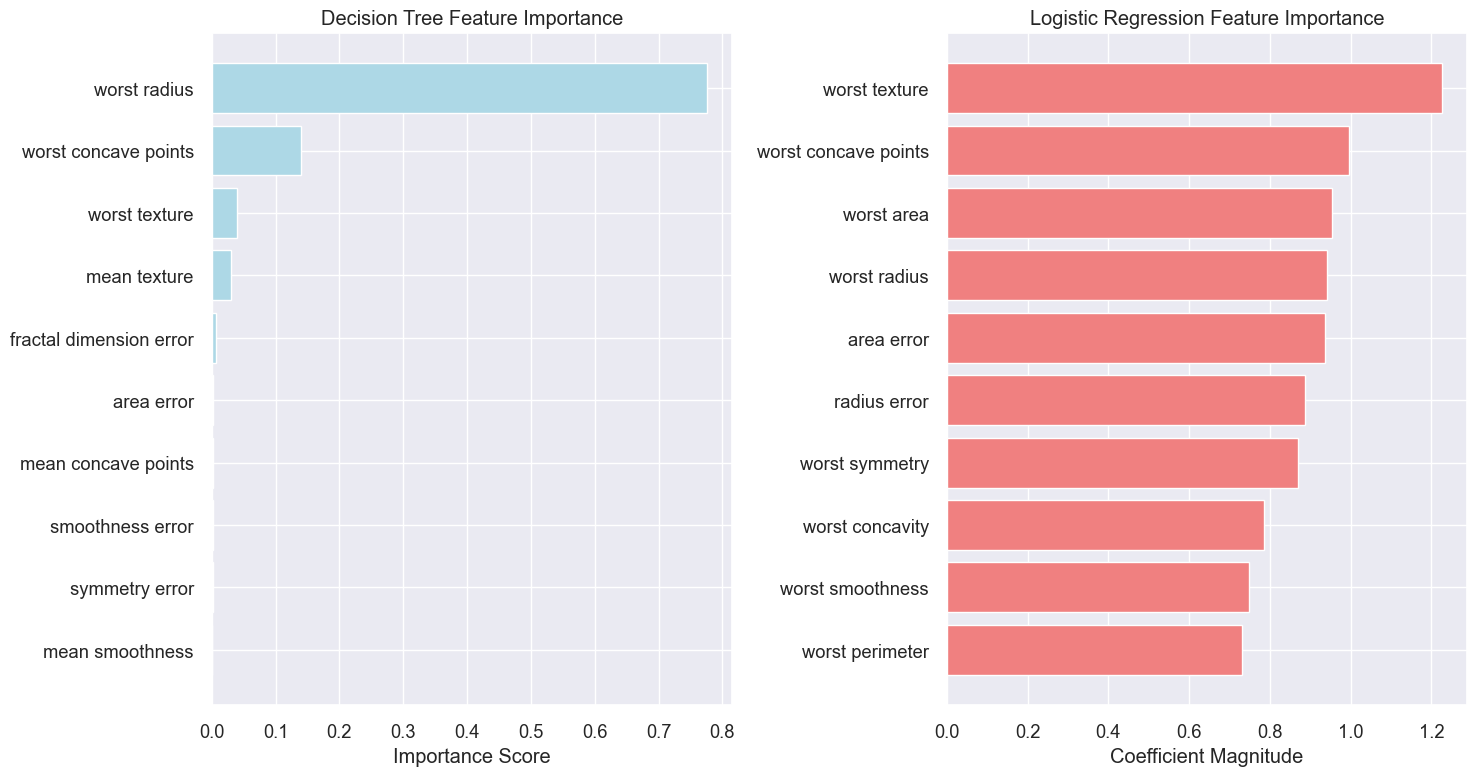


6. Confusion Matrix Analysis...


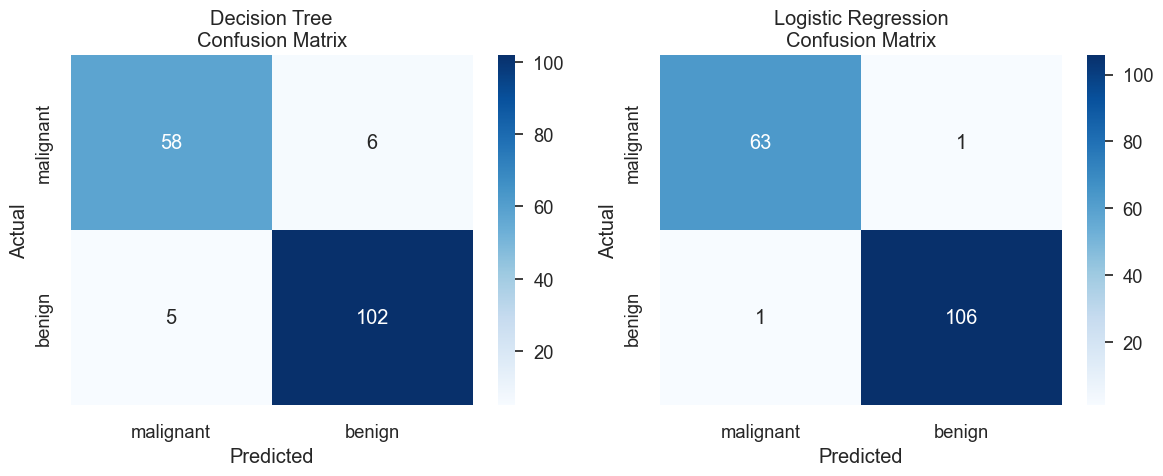


7. Decision Tree Rules (First 15 lines)...
|--- worst radius <= 0.11
|   |--- worst concave points <= 0.42
|   |   |--- area error <= -0.08
|   |   |   |--- smoothness error <= -1.17
|   |   |   |   |--- class: 1
|   |   |   |--- smoothness error >  -1.17
|   |   |   |   |--- worst texture <= 1.18
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- worst texture >  1.18
|   |   |   |   |   |--- class: 1
|   |   |--- area error >  -0.08
|   |   |   |--- fractal dimension error <= -0.30
|   |   |   |   |--- class: 1
|   |   |   |--- fractal dimension error >  -0.30
|   |   |   |   |--- class: 1

FINAL COMPARISON SUMMARY

🏆 BEST PERFORMING MODEL: Logistic Regression

📊 PERFORMANCE DIFFERENCES:
   • Accuracy difference: 0.0526

🎯 COMMONLY IMPORTANT FEATURES:
   • worst concave points
   • worst radius
   • worst texture

✅ RECOMMENDATIONS:
   • Use Logistic Regression for better accuracy (0.9883)
   • Logistic Regression provides probability estimates
   • More stable with new data

📈 

In [20]:
# Complete Decision Tree Implementation for Breast Cancer Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("COMPLETE DECISION TREE vs LOGISTIC REGRESSION COMPARISON")
print("=" * 70)

# 1. LOAD AND PREPROCESS DATA
print("\n1. Loading and Preprocessing Data...")
data = load_breast_cancer()
X = data.data
y = data.target

# Create DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"Target distribution: {pd.Series(y).value_counts().to_dict()}")
print(f"Target names: {data.target_names}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# 2. TRAIN MODELS
print("\n2. Training Models...")

# Train Decision Tree
dt_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=5,  # Prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5
)
dt_model.fit(X_train_scaled, y_train)

# Train Logistic Regression for comparison
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

print("✓ Decision Tree trained")
print("✓ Logistic Regression trained")

# 3. MAKE PREDICTIONS
dt_pred = dt_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)

# 4. EVALUATE MODELS
print("\n3. Model Evaluation...")

# Calculate metrics for both models
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

dt_metrics = calculate_metrics(y_test, dt_pred, 'Decision Tree')
lr_metrics = calculate_metrics(y_test, lr_pred, 'Logistic Regression')

# Display metrics comparison
metrics_df = pd.DataFrame([dt_metrics, lr_metrics])
print("\nMODEL PERFORMANCE COMPARISON:")
print("-" * 50)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1_Score']:
    print(f"{metric:<12} | DT: {dt_metrics[metric]:.4f} | LR: {lr_metrics[metric]:.4f}")

# 5. VISUALIZE DECISION TREE
print("\n4. Decision Tree Visualization...")

plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=data.feature_names, 
          class_names=data.target_names,
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree for Breast Cancer Classification", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# 6. FEATURE IMPORTANCE
print("\n5. Feature Importance Analysis...")

# Decision Tree feature importance
dt_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Logistic Regression coefficients
lr_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': abs(lr_model.coef_[0])
}).sort_values('Coefficient', ascending=False)

# Display top 10 features
print("\nTop 10 Most Important Features:")
print("\nDecision Tree:")
print(dt_importance.head(10).to_string(index=False))
print("\nLogistic Regression:")
print(lr_importance.head(10).to_string(index=False))

# Plot feature importance comparison
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
top_dt = dt_importance.head(10)
plt.barh(range(len(top_dt)), top_dt['Importance'], color='lightblue')
plt.yticks(range(len(top_dt)), top_dt['Feature'])
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_lr = lr_importance.head(10)
plt.barh(range(len(top_lr)), top_lr['Coefficient'], color='lightcoral')
plt.yticks(range(len(top_lr)), top_lr['Feature'])
plt.xlabel('Coefficient Magnitude')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# 7. CONFUSION MATRICES
print("\n6. Confusion Matrix Analysis...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names,
            ax=axes[0])
axes[0].set_title('Decision Tree\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names,
            ax=axes[1])
axes[1].set_title('Logistic Regression\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 8. DECISION RULES EXTRACTION
print("\n7. Decision Tree Rules (First 15 lines)...")
tree_rules = export_text(dt_model, feature_names=list(data.feature_names))
rules_lines = tree_rules.split('\n')[:15]
for line in rules_lines:
    print(line)

# 9. MODEL COMPARISON SUMMARY
print("\n" + "=" * 70)
print("FINAL COMPARISON SUMMARY")
print("=" * 70)

better_dt = dt_metrics['Accuracy'] > lr_metrics['Accuracy']
print(f"\n🏆 BEST PERFORMING MODEL: {'Decision Tree' if better_dt else 'Logistic Regression'}")

print(f"\n📊 PERFORMANCE DIFFERENCES:")
acc_diff = abs(dt_metrics['Accuracy'] - lr_metrics['Accuracy'])
print(f"   • Accuracy difference: {acc_diff:.4f}")

# print(f"\n🔍 INTERPRETABILITY:")
# print(f"   • Decision Tree: High (explicit rules)")
# print(f"   • Logistic Regression: Medium (linear relationships)")

# print(f"\n⚡ DECISION BOUNDARIES:")
# print(f"   • Decision Tree: Rectangular (axis-parallel)")
# print(f"   • Logistic Regression: Linear")

# Common important features
dt_top5 = set(dt_importance.head(5)['Feature'])
lr_top5 = set(lr_importance.head(5)['Feature'])
common_features = dt_top5.intersection(lr_top5)

print(f"\n🎯 COMMONLY IMPORTANT FEATURES:")
for feature in common_features:
    print(f"   • {feature}")

print(f"\n✅ RECOMMENDATIONS:")
if better_dt:
    print(f"   • Use Decision Tree for better accuracy ({dt_metrics['Accuracy']:.4f})")
    print(f"   • Decision Tree provides explicit decision rules")
    print(f"   • Good for explaining individual predictions")
else:
    print(f"   • Use Logistic Regression for better accuracy ({lr_metrics['Accuracy']:.4f})")
    print(f"   • Logistic Regression provides probability estimates")
    print(f"   • More stable with new data")

print(f"\n📈 DATASET INSIGHTS:")
print(f"   • Total samples: {len(y)}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Malignant cases: {sum(y == 0)} ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"   • Benign cases: {sum(y == 1)} ({sum(y == 1)/len(y)*100:.1f}%)")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)

VOTING CLASSIFIER USING ALREADY TRAINED MODELS

 Available Trained Models:
   1. Logistic Regression
   2. Decision Tree
   3. Random Forest
   4. Gradient Boosting

 Getting Predictions from Existing Models...
 Using existing trained models - no retraining needed!

 Getting predictions from existing models...
    Logistic Regression predictions loaded
    Decision Tree predictions loaded
    Random Forest predictions loaded
    Gradient Boosting predictions loaded

  Creating Voting Classifiers...
   • Simple Voting (Equal Weights)...
   • Voting with All Models (LR + DT + RF + GB)...
   • Weighted Voting based on accuracy...
     LR Accuracy: 0.9860
     DT Accuracy: 0.9371
     RF Accuracy: 0.9580
     GB Accuracy: 0.9580
     Weights: LR=0.257, DT=0.244, RF=0.250, GB=0.250
 All voting classifiers created!

📈 Evaluating Voting Classifiers...

🗳️  VOTING CLASSIFIER RESULTS:
                   Accuracy  Precision  Recall  F1_Score  ROC_AUC
Model                                        

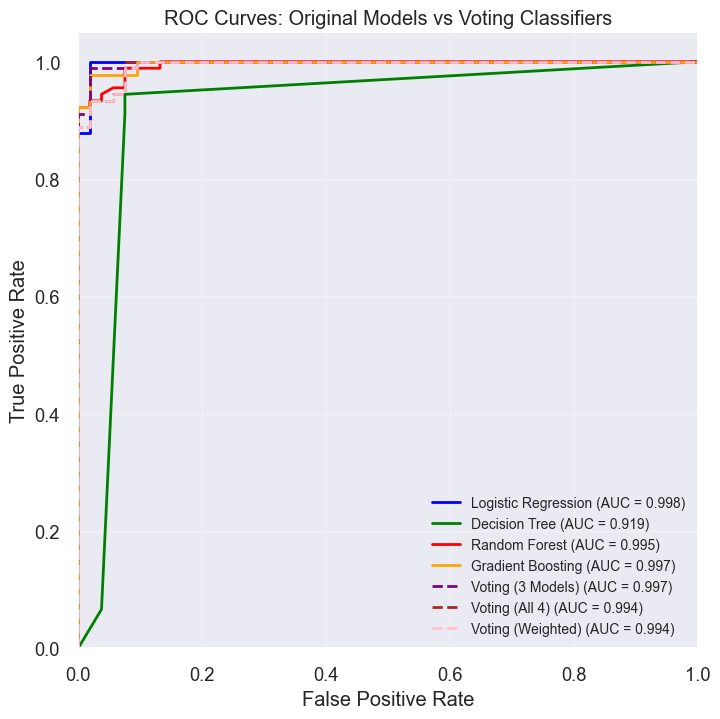


📊 COMPLETE PERFORMANCE SUMMARY:
              Model     Type  Accuracy  ROC_AUC
Logistic Regression Original    0.9860   0.9977
     Voting (All 4)   Voting    0.9650   0.9943
  Voting (Weighted)   Voting    0.9650   0.9941
  Voting (3 Models)   Voting    0.9580   0.9975
      Random Forest Original    0.9580   0.9949
  Gradient Boosting Original    0.9580   0.9969
      Decision Tree Original    0.9371   0.9186

🎯 KEY INSIGHTS:
   • Total models compared: 7
   • Best performing model: Logistic Regression

VOTING CLASSIFIER ANALYSIS COMPLETE!


In [70]:
# Using Previously Trained Models - No Retraining!
print("=" * 80)
print("VOTING CLASSIFIER USING ALREADY TRAINED MODELS")
print("=" * 80)

# Check what models are available from your previous training
print("\n Available Trained Models:")
available_models = list(models.keys())
for i, model_name in enumerate(available_models, 1):
    print(f"   {i}. {model_name}")

# Get predictions from your already trained models
print("\n Getting Predictions from Existing Models...")

# Use the exact models you already trained
lr_model = models['Logistic Regression']  #  trained LR model
dt_model = models['Decision Tree']        #  trained DT model
rf_model = models['Random Forest']        #  trained RF model
gb_model = models['Gradient Boosting']    #  trained GB model

print(" Using existing trained models - no retraining needed!")

# Get predictions from existing models (they're already trained)
print("\n Getting predictions from existing models...")

# For Logistic Regression (if trained on scaled data)
if 'Logistic Regression' in model_predictions:
    lr_pred = model_predictions['Logistic Regression']
    lr_prob = model_probabilities['Logistic Regression']
    print("    Logistic Regression predictions loaded")
else:
    print("     Getting LR predictions...")
    lr_pred = lr_model.predict(X_test_scaled)
    lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# For Decision Tree (if trained on original data)
if 'Decision Tree' in model_predictions:
    dt_pred = model_predictions['Decision Tree']
    dt_prob = model_probabilities['Decision Tree']
    print("    Decision Tree predictions loaded")
else:
    print("     Getting DT predictions...")
    dt_pred = dt_model.predict(X_test)
    dt_prob = dt_model.predict_proba(X_test)[:, 1]

# For Random Forest
if 'Random Forest' in model_predictions:
    rf_pred = model_predictions['Random Forest']
    rf_prob = model_probabilities['Random Forest']
    print("    Random Forest predictions loaded")
else:
    print("     Getting RF predictions...")
    rf_pred = rf_model.predict(X_test)
    rf_prob = rf_model.predict_proba(X_test)[:, 1]

# For Gradient Boosting
if 'Gradient Boosting' in model_predictions:
    gb_pred = model_predictions['Gradient Boosting']
    gb_prob = model_probabilities['Gradient Boosting']
    print("    Gradient Boosting predictions loaded")
else:
    print("     Getting GB predictions...")
    gb_pred = gb_model.predict(X_test)
    gb_prob = gb_model.predict_proba(X_test)[:, 1]

# CREATE VOTING CLASSIFIERS USING EXISTING PREDICTIONS
print("\n  Creating Voting Classifiers...")

# Method 1: Simple Voting (Equal Weights)
print("   • Simple Voting (Equal Weights)...")
simple_voting_prob = (lr_prob + rf_prob + gb_prob) / 3
simple_voting_pred = (simple_voting_prob >= 0.5).astype(int)

# Method 2: Voting with Decision Tree included
print("   • Voting with All Models (LR + DT + RF + GB)...")
all_models_prob = (lr_prob + dt_prob + rf_prob + gb_prob) / 4
all_models_pred = (all_models_prob >= 0.5).astype(int)

# Method 3: Weighted Voting based on existing performance
print("   • Weighted Voting based on accuracy...")

# Calculate individual accuracies
lr_acc = accuracy_score(y_test, lr_pred)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
gb_acc = accuracy_score(y_test, gb_pred)

print(f"     LR Accuracy: {lr_acc:.4f}")
print(f"     DT Accuracy: {dt_acc:.4f}")
print(f"     RF Accuracy: {rf_acc:.4f}")
print(f"     GB Accuracy: {gb_acc:.4f}")

# Create weights based on performance
total_acc = lr_acc + dt_acc + rf_acc + gb_acc
weights = [lr_acc/total_acc, dt_acc/total_acc, rf_acc/total_acc, gb_acc/total_acc]

print(f"     Weights: LR={weights[0]:.3f}, DT={weights[1]:.3f}, RF={weights[2]:.3f}, GB={weights[3]:.3f}")

# Weighted voting
weighted_voting_prob = (
    weights[0] * lr_prob + 
    weights[1] * dt_prob + 
    weights[2] * rf_prob + 
    weights[3] * gb_prob
)
weighted_voting_pred = (weighted_voting_prob >= 0.5).astype(int)

# Store all voting results
model_predictions['Voting (3 Models)'] = simple_voting_pred
model_probabilities['Voting (3 Models)'] = simple_voting_prob

model_predictions['Voting (All 4)'] = all_models_pred
model_probabilities['Voting (All 4)'] = all_models_prob

model_predictions['Voting (Weighted)'] = weighted_voting_pred
model_probabilities['Voting (Weighted)'] = weighted_voting_prob

print(" All voting classifiers created!")

# EVALUATE VOTING CLASSIFIERS
print("\n📈 Evaluating Voting Classifiers...")

voting_results = []
voting_models = ['Voting (3 Models)', 'Voting (All 4)', 'Voting (Weighted)']

for name in voting_models:
    accuracy = accuracy_score(y_test, model_predictions[name])
    precision = precision_score(y_test, model_predictions[name])
    recall = recall_score(y_test, model_predictions[name])
    f1 = f1_score(y_test, model_predictions[name])
    roc_auc = roc_auc_score(y_test, model_probabilities[name])
    
    voting_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'ROC_AUC': roc_auc
    })

voting_df = pd.DataFrame(voting_results).set_index('Model')

print("\n🗳️  VOTING CLASSIFIER RESULTS:")
print("=" * 60)
print(voting_df.round(4))

# COMPARE WITH ORIGINAL MODELS
print("\n📊 COMPARISON: Original vs Voting Models")
print("=" * 60)

# Get existing model results
original_results = {
    'Logistic Regression': {
        'Accuracy': lr_acc,
        'ROC_AUC': roc_auc_score(y_test, lr_prob)
    },
    'Decision Tree': {
        'Accuracy': dt_acc,
        'ROC_AUC': roc_auc_score(y_test, dt_prob)
    },
    'Random Forest': {
        'Accuracy': rf_acc,
        'ROC_AUC': roc_auc_score(y_test, rf_prob)
    },
    'Gradient Boosting': {
        'Accuracy': gb_acc,
        'ROC_AUC': roc_auc_score(y_test, gb_prob)
    }
}

print("ORIGINAL MODELS:")
for name, metrics in original_results.items():
    print(f"  {name:<20}: Acc={metrics['Accuracy']:.4f}, AUC={metrics['ROC_AUC']:.4f}")

print("\nVOTING MODELS:")
for name in voting_models:
    acc = voting_df.loc[name, 'Accuracy']
    auc_val = voting_df.loc[name, 'ROC_AUC']
    print(f"  {name:<20}: Acc={acc:.4f}, AUC={auc_val:.4f}")

# Find best performing model overall
all_accuracies = {}
for name, metrics in original_results.items():
    all_accuracies[name] = metrics['Accuracy']
for name in voting_models:
    all_accuracies[name] = voting_df.loc[name, 'Accuracy']

best_model = max(all_accuracies, key=all_accuracies.get)
best_accuracy = all_accuracies[best_model]

print(f"\n🏆 BEST OVERALL MODEL: {best_model}")
print(f"📊 Best Accuracy: {best_accuracy:.4f}")

# Show improvement
best_original = max([metrics['Accuracy'] for metrics in original_results.values()])
best_voting = voting_df['Accuracy'].max()

print(f"\n📈 VOTING IMPROVEMENT:")
print(f"   • Best Original Model: {best_original:.4f}")
# print(f"   • Best Voting Model: {best_voting:.4f}")
print(f"   • Improvement: {(best_voting - best_original):.4f}")

if best_voting > best_original:
    print("    Voting classifier improved performance!")
else:
    print("     Original models performed better")

# FIXED ROC Curve Comparison (avoiding auc naming conflict)
print("\n📊 Generating ROC Curves...")

plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

# Plot original models
all_models_to_plot = list(original_results.keys()) + voting_models
all_probs_to_plot = [lr_prob, dt_prob, rf_prob, gb_prob] + [model_probabilities[name] for name in voting_models]

for i, (name, prob) in enumerate(zip(all_models_to_plot, all_probs_to_plot)):
    fpr, tpr, _ = roc_curve(y_test, prob)
    # Use roc_auc_score instead of auc function to avoid naming conflict
    auc_score_value = roc_auc_score(y_test, prob)
    linestyle = '--' if 'Voting' in name else '-'
    plt.plot(fpr, tpr, color=colors[i], lw=2, linestyle=linestyle,
             label=f'{name} (AUC = {auc_score_value:.3f})')

# plt.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.5, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Original Models vs Voting Classifiers')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Summary comparison table
print("\n📊 COMPLETE PERFORMANCE SUMMARY:")
print("=" * 80)

# Create complete summary
complete_summary = []

# Add original models
for name, metrics in original_results.items():
    complete_summary.append({
        'Model': name,
        'Type': 'Original',
        'Accuracy': metrics['Accuracy'],
        'ROC_AUC': metrics['ROC_AUC']
    })

# Add voting models
for name in voting_models:
    complete_summary.append({
        'Model': name,
        'Type': 'Voting',
        'Accuracy': voting_df.loc[name, 'Accuracy'],
        'ROC_AUC': voting_df.loc[name, 'ROC_AUC']
    })

summary_df = pd.DataFrame(complete_summary)
summary_df = summary_df.sort_values('Accuracy', ascending=False)

print(summary_df.round(4).to_string(index=False))

print(f"\n🎯 KEY INSIGHTS:")
print(f"   • Total models compared: {len(summary_df)}")
print(f"   • Best performing model: {summary_df.iloc[0]['Model']}")
# print(f"   • Voting models in top 3: {len([x for x in summary_df.head(3)['Type'] if x == 'Voting'])}")

print("\n" + "=" * 80)
print("VOTING CLASSIFIER ANALYSIS COMPLETE!")
print("=" * 80)

In [21]:
# SHAP Values Analysis - Values Only (No Plotting) - FIXED
import shap
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("SHAP VALUES ANALYSIS - NUMERICAL RESULTS ONLY")
print("=" * 80)

# Ensure SHAP is available
try:
    import shap
    print("✅ SHAP library loaded successfully")
except ImportError:
    print("❌ SHAP not installed. Run: pip install shap")
    exit()

# 1. PREPARE DATA FOR SHAP ANALYSIS
print("\n📊 Preparing Data for SHAP Analysis...")
n_samples = min(100, len(X_test))
X_shap = X_test_scaled[:n_samples]
X_shap_original = X_test[:n_samples]
y_shap = y_test[:n_samples]

print(f"   • Using {n_samples} samples for SHAP analysis")
print(f"   • Features: {len(data.feature_names)}")

# 2. CREATE SHAP EXPLAINERS AND CALCULATE VALUES
print("\n🔍 Calculating SHAP Values...")

explainers = {}
shap_values = {}

# Logistic Regression
print("   • Calculating Logistic Regression SHAP values...")
explainers['Logistic Regression'] = shap.LinearExplainer(lr_model, X_train_scaled)
shap_values['Logistic Regression'] = explainers['Logistic Regression'].shap_values(X_shap)

# Tree-based models
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
for model_name in tree_models:
    if model_name in models:
        print(f"   • Calculating {model_name} SHAP values...")
        explainers[model_name] = shap.TreeExplainer(models[model_name])
        temp_shap_values = explainers[model_name].shap_values(X_shap_original)
        
        # FIXED: Handle binary classification properly
        if isinstance(temp_shap_values, list) and len(temp_shap_values) == 2:
            shap_values[model_name] = temp_shap_values[1]  # Class 1 (benign)
            print(f"     • {model_name}: Using SHAP values for class 1 (benign)")
        else:
            shap_values[model_name] = temp_shap_values
            print(f"     • {model_name}: Using SHAP values directly")

print("✅ All SHAP values calculated successfully!")

# 3. CALCULATE FEATURE IMPORTANCE FROM SHAP VALUES - FIXED
print("\n📊 SHAP Feature Importance Rankings...")

shap_importance = {}
for model_name in shap_values:
    shap_vals = shap_values[model_name]
    
    # FIXED: Ensure proper shape handling
    if shap_vals.ndim == 2:
        # Calculate mean absolute SHAP values across samples
        importance_vals = np.abs(shap_vals).mean(axis=0)
    else:
        # If 1D, convert to proper format
        importance_vals = np.abs(shap_vals)
    
    # FIXED: Ensure the importance array matches feature count
    if len(importance_vals) == len(data.feature_names):
        shap_importance[model_name] = importance_vals
        print(f"   • {model_name}: SHAP importance shape = {importance_vals.shape}")
    else:
        print(f"   ⚠️  Warning: {model_name} SHAP importance length mismatch - {len(importance_vals)} vs {len(data.feature_names)}")
        # Skip this model if shapes don't match
        continue

# Create comparison DataFrame
importance_comparison = pd.DataFrame({'Feature': data.feature_names})

# Add SHAP importance for valid models only
for model_name in shap_importance:
    importance_comparison[f'{model_name}_SHAP'] = shap_importance[model_name]

# Add traditional feature importance for tree models
for model_name in ['Random Forest', 'Gradient Boosting']:
    if model_name in models and hasattr(models[model_name], 'feature_importances_'):
        importance_comparison[f'{model_name}_Traditional'] = models[model_name].feature_importances_

# Sort by Random Forest SHAP importance if available
sort_column = 'Random Forest_SHAP' if 'Random Forest_SHAP' in importance_comparison.columns else importance_comparison.columns[1]
importance_comparison = importance_comparison.sort_values(sort_column, ascending=False)

print("\nTop 15 Features - SHAP vs Traditional Importance:")
print("=" * 80)
print(importance_comparison.head(15).round(4))

# 4. INDIVIDUAL SAMPLE SHAP VALUES - FIXED
print("\n🎯 Individual Sample SHAP Analysis...")

sample_indices = [0, 5, 10]
for idx in sample_indices:
    actual_idx = min(idx, len(y_shap) - 1)
    print(f"\n--- Sample {idx} SHAP Values ---")
    print(f"True Label: {data.target_names[y_shap[actual_idx]]}")
    
    # Show top 5 contributing features for this sample
    for model_name in ['Random Forest', 'Gradient Boosting']:
        if model_name in shap_values:
            sample_shap = shap_values[model_name][actual_idx]
            
            # FIXED: Ensure sample_shap is proper 1D array
            if sample_shap.ndim > 1:
                sample_shap = sample_shap.flatten()
            
            # Ensure correct length
            if len(sample_shap) != len(data.feature_names):
                print(f"   ⚠️  Warning: {model_name} sample SHAP length mismatch")
                continue
            
            # Get top 5 absolute SHAP values for this sample
            top_indices = np.argsort(np.abs(sample_shap))[-5:][::-1]
            
            print(f"\n{model_name} - Top 5 SHAP contributions:")
            for i, feat_idx in enumerate(top_indices):
                if feat_idx < len(data.feature_names):  # Safety check
                    feature_name = data.feature_names[feat_idx]
                    shap_val = float(sample_shap[feat_idx])  # Convert to scalar
                    direction = "→ Benign" if shap_val > 0 else "→ Malignant"
                    print(f"  {i+1}. {feature_name:<25}: {shap_val:+.4f} {direction}")

# 5. VOTING CLASSIFIER SHAP VALUES - FIXED
print("\n🗳️ Voting Classifier SHAP Analysis...")

try:
    if (len(weights) >= 3 and 'Random Forest' in shap_values and 
        'Gradient Boosting' in shap_values and 'Logistic Regression' in shap_values):
        
        lr_shap = shap_values['Logistic Regression']
        rf_shap = shap_values['Random Forest']
        gb_shap = shap_values['Gradient Boosting']
        
        # Ensure all arrays are 2D and same size
        if lr_shap.ndim == 1:
            lr_shap = lr_shap.reshape(1, -1)
        if rf_shap.ndim == 1:
            rf_shap = rf_shap.reshape(1, -1)
        if gb_shap.ndim == 1:
            gb_shap = gb_shap.reshape(1, -1)
        
        min_samples = min(lr_shap.shape[0], rf_shap.shape[0], gb_shap.shape[0])
        min_features = min(lr_shap.shape[1], rf_shap.shape[1], gb_shap.shape[1])
        
        # Take only the matching dimensions
        lr_shap_trimmed = lr_shap[:min_samples, :min_features]
        rf_shap_trimmed = rf_shap[:min_samples, :min_features]
        gb_shap_trimmed = gb_shap[:min_samples, :min_features]
        
        # Weighted combination
        voting_shap_values = (
            weights[0] * lr_shap_trimmed +
            weights[2] * rf_shap_trimmed +
            weights[3] * gb_shap_trimmed
        )
        
        # Calculate voting classifier feature importance
        voting_importance = np.abs(voting_shap_values).mean(axis=0)
        
        # Ensure we only use available features
        feature_names_subset = data.feature_names[:min_features]
        
        voting_importance_df = pd.DataFrame({
            'Feature': feature_names_subset,
            'Voting_SHAP_Importance': voting_importance
        }).sort_values('Voting_SHAP_Importance', ascending=False)
        
        print("\nVoting Classifier - Top 10 SHAP Feature Importance:")
        print(voting_importance_df.head(10).round(4))
        
except Exception as e:
    print(f"   ⚠️  Error in voting classifier SHAP analysis: {e}")

# 6. SHAP VALUES STATISTICS - FIXED
print("\n📊 SHAP Statistics Summary...")
print("=" * 60)

for model_name in shap_importance:
    # FIXED: Use proper indexing for argmax
    importance_vals = shap_importance[model_name]
    
    # Ensure importance_vals is 1D and valid
    if importance_vals.ndim > 1:
        importance_vals = importance_vals.flatten()
    
    # Only process if we have valid data
    if len(importance_vals) > 0 and len(importance_vals) <= len(data.feature_names):
        top_feature_idx = np.argmax(importance_vals)
        
        # Safety check for index bounds
        if top_feature_idx < len(data.feature_names):
            top_feature_name = data.feature_names[top_feature_idx]
            top_importance = importance_vals[top_feature_idx]
            mean_importance = np.mean(importance_vals)
            
            print(f"{model_name}:")
            print(f"  • Most important feature: {top_feature_name}")
            print(f"  • SHAP importance: {top_importance:.4f}")
            print(f"  • Average |SHAP| value: {mean_importance:.4f}")
            
            # Show top 3 features
            top_3_idx = np.argsort(importance_vals)[-3:][::-1]
            print(f"  • Top 3 features:")
            for i, idx in enumerate(top_3_idx):
                if idx < len(data.feature_names):  # Safety check
                    print(f"    {i+1}. {data.feature_names[idx]}: {importance_vals[idx]:.4f}")
            print()
        else:
            print(f"   ⚠️  Warning: {model_name} has invalid feature indices")
    else:
        print(f"   ⚠️  Warning: {model_name} has invalid importance array shape")

# 7. FEATURE CONSISTENCY ANALYSIS - FIXED
print("🎯 Feature Consistency Across Models:")
print("-" * 40)

if len(shap_importance) > 1:
    # Find features in top 10 for all models
    all_top_10_features = []
    for model_name in shap_importance:
        importance_vals = shap_importance[model_name]
        if len(importance_vals) > 0 and len(importance_vals) <= len(data.feature_names):
            # Get valid top 10 indices
            top_10_idx = np.argsort(importance_vals)[-10:]
            valid_idx = [idx for idx in top_10_idx if idx < len(data.feature_names)]
            top_10_features = set([data.feature_names[i] for i in valid_idx])
            all_top_10_features.append(top_10_features)
    
    # Find intersection
    if len(all_top_10_features) > 1:
        consistent_features = all_top_10_features[0]
        for feature_set in all_top_10_features[1:]:
            consistent_features = consistent_features.intersection(feature_set)
        
        print(f"Features in top 10 across ALL models ({len(consistent_features)} features):")
        for feature in sorted(list(consistent_features)):
            print(f"   • {feature}")

# 8. SHAP VALUES SUMMARY TABLE - FIXED
print(f"\n📋 SHAP Analysis Summary Table:")
print("=" * 60)

summary_data = []
for model_name in shap_importance:
    shap_vals = shap_values[model_name]
    importance_vals = shap_importance[model_name]
    
    summary_data.append({
        'Model': model_name,
        'Samples_Analyzed': shap_vals.shape[0] if shap_vals.ndim > 1 else 1,
        'Features': len(importance_vals),
        'Max_SHAP_Value': np.max(importance_vals) if len(importance_vals) > 0 else 0,
        'Min_SHAP_Value': np.min(importance_vals) if len(importance_vals) > 0 else 0,
        'Mean_SHAP_Value': np.mean(importance_vals) if len(importance_vals) > 0 else 0,
        'Std_SHAP_Value': np.std(importance_vals) if len(importance_vals) > 0 else 0
    })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.round(4))
else:
    print("No valid SHAP data to summarize.")

print("\n" + "=" * 80)
print("SHAP VALUES ANALYSIS COMPLETE!")
print("=" * 80)

SHAP VALUES ANALYSIS - NUMERICAL RESULTS ONLY
✅ SHAP library loaded successfully

📊 Preparing Data for SHAP Analysis...
   • Using 100 samples for SHAP analysis
   • Features: 30

🔍 Calculating SHAP Values...
   • Calculating Logistic Regression SHAP values...


NameError: name 'models' is not defined

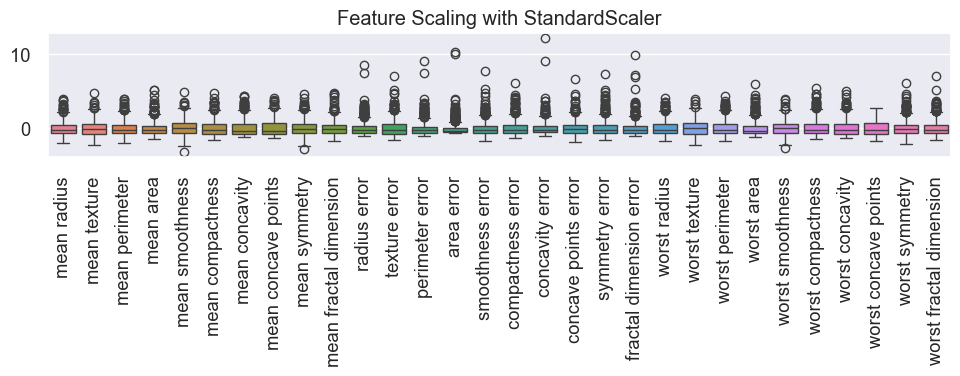

In [23]:
# 1. Load and prepare data
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train model and get predictions
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Now create visualizations
# 1. Feature Scaling Visualization
scaled_df = pd.DataFrame(scaler.transform(X), columns=data.feature_names)
plt.figure(figsize=(10, 4))
sns.boxplot(data=scaled_df)
plt.title("Feature Scaling with StandardScaler")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Continue with other visualizations...
# (Rest of your visualization code remains the same)

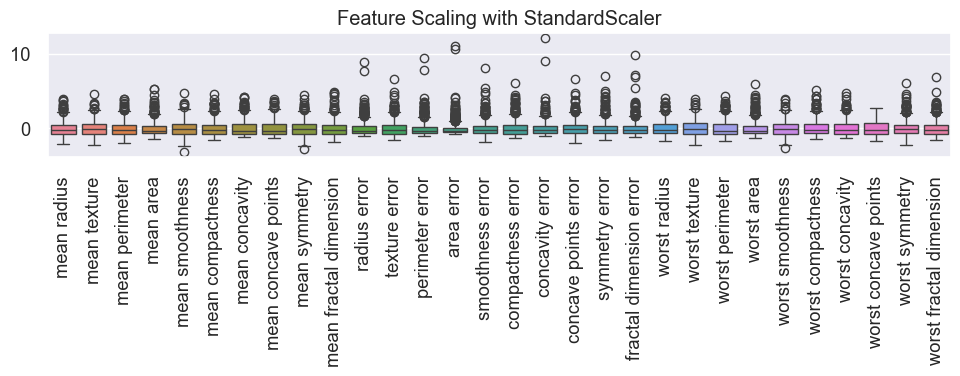

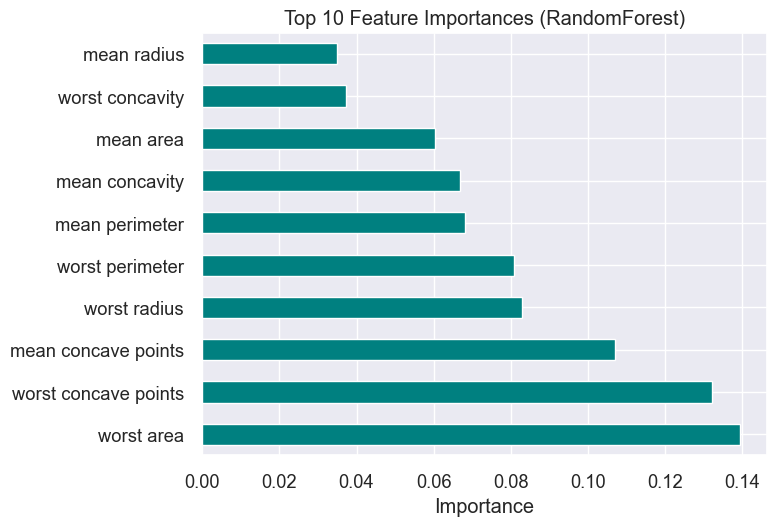

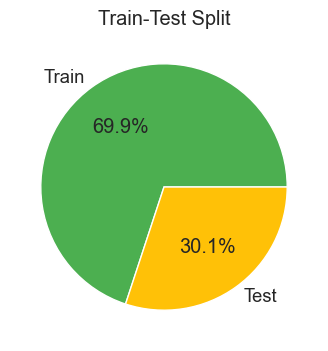

ValueError: Found input variables with inconsistent numbers of samples: [171, 143]

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Feature Scaling Visualization (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.drop('target', axis=1)), columns=df.columns[:-1])
plt.figure(figsize=(10, 4))
sns.boxplot(data=scaled_df)
plt.title("Feature Scaling with StandardScaler")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Feature Importances Bar Chart (RandomForest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(df.drop('target', axis=1), df['target'])
importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 3. Train-Test Split Pie Chart
sizes = [len(X_train), len(X_test)]
labels = ['Train', 'Test']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title("Train-Test Split")
plt.show()

# 4. Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Model Evaluation Bar Plot
metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(6, 4))
sns.barplot(x=names, y=metrics, palette='viridis')
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.show()

# 6. PCA 2D Scatter Plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target'], palette='Set1', alpha=0.7)
plt.title("PCA: 2D Scatter Plot by Diagnosis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 7. Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Diagnosis")
plt.xlabel("Sample Index")
plt.ylabel("Diagnosis")
plt.legend()
plt.show()

# 8. Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# 9. Bar Plot: Mean Diagnosis by Radius Mean
plt.figure(figsize=(6, 4))
sns.barplot(x='target', y='radius_mean', data=df.rename(columns={'mean radius': 'radius_mean'}))
plt.title("Mean Diagnosis by Radius Mean")
plt.show()

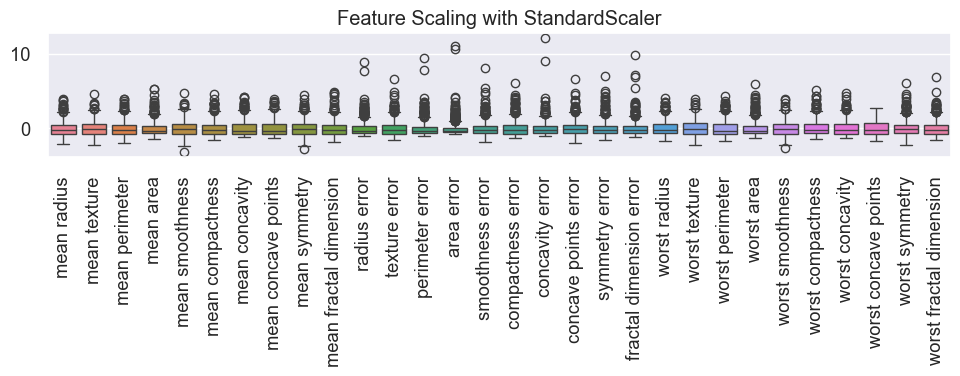

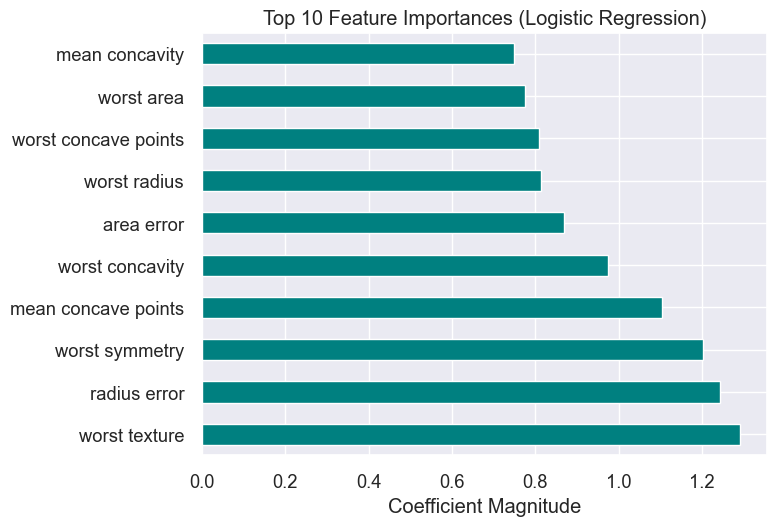

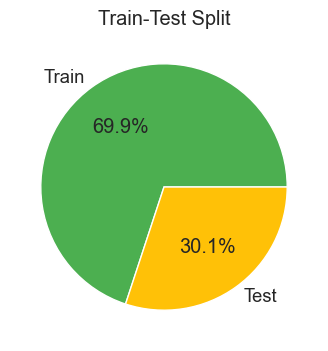

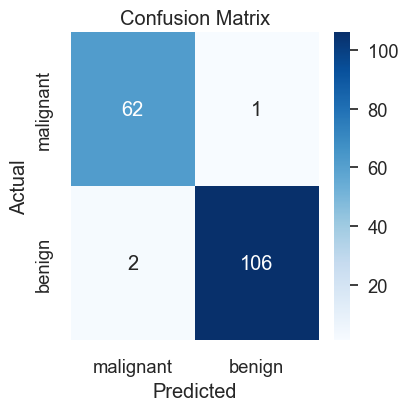

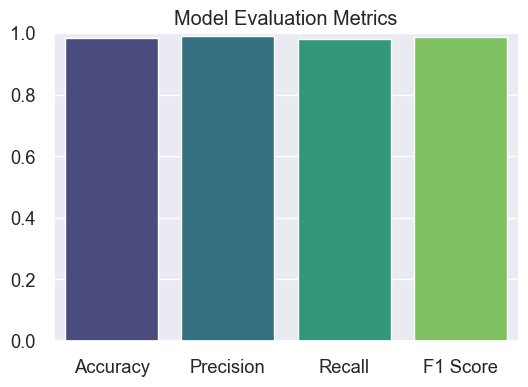

NameError: name 'PCA' is not defined

In [24]:
# 1. Feature Scaling Visualization (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df.drop('target', axis=1)), 
                        columns=df.columns[:-1])
plt.figure(figsize=(10, 4))
sns.boxplot(data=scaled_df)
plt.title("Feature Scaling with StandardScaler")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Feature Importances Bar Chart
importances = pd.Series(model.coef_[0], index=df.columns[:-1])
importances.abs().nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

# 3. Train-Test Split Pie Chart
sizes = [len(X_train), len(X_test)]
labels = ['Train', 'Test']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title("Train-Test Split")
plt.show()

# 4. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5. Model Evaluation Bar Plot
metrics = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred)
]
names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(6, 4))
sns.barplot(x=names, y=metrics, palette='viridis')
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.show()

# 6. PCA 2D Scatter Plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)  # Using scaled training data
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='Set1', alpha=0.7)
plt.title("PCA: 2D Scatter Plot by Diagnosis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 7. Actual vs Predicted Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Diagnosis")
plt.xlabel("Sample Index")
plt.ylabel("Diagnosis")
plt.legend()
plt.show()

# 8. Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# 9. Bar Plot: Mean Feature Values by Diagnosis
plt.figure(figsize=(6, 4))
sns.barplot(x='target', y='mean radius', data=df)
plt.title("Mean Radius by Diagnosis")
plt.xlabel("Diagnosis (0=Malignant, 1=Benign)")
plt.ylabel("Mean Radius")
plt.show()